# Исследование данных для интернет-магазина «Стримчик»

## Оглавление

[2 Введение](#1)
  
[3 Знакомство с данными](#2)
  
[4 Вывод](#3)
  
[5 Предобработка данных](#4)
* [5.1 Изменение названий столбцов](#5)
* [5.2 Изменение типа данных](#6)
* [5.3 Вывод](#7)
* [5.4 Исследование пропусков в данных](#8)
* [5.5 Вывод](#9)
* [5.6 Обработка дубликатов](#10)
* [5.7 Вывод](#11)
* [5.6 Добавление нового столбца](#12)
  
[6 Вывод](#13)
  
[7 Исследовательский анализ данных](#14)
* [7.1 Анализ выпуска игр по годам](#15)
* [7.2 Вывод](#16)
* [7.3 Анализ платформ по уровню продаж](#17)
* [7.4 Вывод](#18)
* [7.5 Определение актуального периода](#19)
* [7.6 Вывод](#20)
* [7.7 Исследование уровня продаж платформ за актуальный период](#21)
* [7.8 Вывод](#22)
* [7.9 Исследование глобальных продаж игр на различных платформах](#23)
* [7.10 Вывод](#24)
* [7.11 Исследования влияния отзывов пользователей и критиков на продажи](#25)
    * [7.11.1 Анализ влияния отзывов критиков на суммарные продажи на платформе PS4](#26)
    * [7.11.2 Вывод](#27)
    * [7.11.3 Анализ влияния отзывов пользователей на суммарные продажи на платформе PS4](#28)
    * [7.11.4 Вывод](#29)
    * [7.11.5 Анализ влияния отзывов критиков на суммарные продажи на других платформах](#30)
    * [7.11.6 Вывод](#31)
    * [7.11.7 Анализ влияния отзывов пользователей на суммарные продажи на других платформах](#32)
    * [7.11.8 Вывод](#33)
* [7.12 Вывод](#34)
* [7.13 Распределение игр по жанрам](#35)
* [7.14 Вывод](#36)

[8 Портрет пользователя каждого региона](#37)
* [8.1 Топ-5 популярных платформ для каждого региона](#38)
* [8.2 Вывод](#39)
* [8.3 Топ-5 популярных жанров для каждого региона](#40)
* [8.4 Вывод](#41)
* [8.5 Влияние рейтинга ESRB на продажи в отдельном регионе](#42)
* [8.6 Вывод](#43)

[9 Вывод](#44)

[10 Проверка гипотез](#45)
* [10.1 Гипотеза 1](#46)
* [10.2 Вывод](#47)
* [10.3 Гипотеза 2](#48)
* [10.4 Вывод](#49)

[11 Вывод](#50)

[12 Общий вывод](#51)

## Введение
<a id=1></a>

**Цель исследования** - выявить особенности, определяющие успешность выпускаемых игр,  для последующего выявления потенциально популярных продуктов.

**Задачи:**
**1.** Выполнить предобработку данных: скорректировать названия столбцов, удалить пустые строки, изменить типы данных, добавить недостающую колонку.

**2.** Провести исследовательский анализ данных: 
- проанализировать даты запуска игр;
- проанализировать продажи на различных патформах и определить наиболее успешные;
- выявить актуальный период данных для построения прогноза на 2017 год;
- обнаружить потенциально прибыльные платформы;
- построить диаграмму размаха по глобальным продажам игр в разбивке по платформам;
- описать влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы;
- рассмотреть общее распределение игр по жанрам.    
    
**3.** Составить портрет пользователя каждого региона (NA, EU, JP):
- определить топ-5 популярных платформ;
- определить топ-5 популярных жанров;
- определить влияет ли рейтинг ESRB на продажи в отдельном регионе.


**4.** Сформулировать и проверить гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и средних пользовательских рейтингов жанров Action и Sports.


**Исходные данные:** данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

## Знакомство с данными
<a id=2></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
from scipy import stats as st
from scipy.stats import binom
from math import factorial
from math import sqrt
from sklearn.datasets import load_iris

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/Users/marinagerasimova/Downloads/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

## Вывод
<a id=3></a>

В таблице *data* 11 колонок и 16715 строк. Есть пропуски в колонках *Name* (2 пропуска), *Year_of_Release* (269 пропусков),*Genre* (2 пропуска), *Critic_Score* (8578 пропусков), *User_Score* (6701 пропуск), *Rating* (6766 пропусков). В колонках *Year_of_Release* и *User_Score* необходимо изменить тип данных. Названия колонок стоит привести к нижнему регистру. В целом данные требует дальнейшего изучения.

## Предобработка данных
<a id=4></a>

В процессе предобработки данных необходимо выполнить следующее:
- изменить названия столбцов (привести к нижнему регистру);
- преобразовать данные в нужные типы;
- выявить и обработать дубликаты;
- обработать пропуски при необходимости;
- добавить столбец с суммарными продажами во всех регионах.

### Изменение названий столбцов
<a id=5></a>

In [5]:
#изменим названия столбцов

data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типа данных
<a id=6></a>

In [6]:
#изменим тип данных в столбце year_of_release на int

data['year_of_release'] = pd.array(data['year_of_release'], dtype=pd.Int64Dtype())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Прежде чем изменить тип данных в столбце *user_score* на *float*, заменим значения *tbd* и *nan* на *None*. *tbd (to be determined, to be decided)* указывает на то, что информация отсутствует, поэтому для дальнейшей работы с этими строками необходимо заполнить их *None*. 

In [7]:
data['user_score'] = data['user_score'].replace('tbd', None, regex=True)
data['user_score'] = data['user_score'].replace('nan', None, regex=True)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Вывод
<a id=7></a>

В колонках *year_of_release* и *user_score* был изменен тип данных. Столбец *year_of_release* приведен к *int*, так как год может быть только целым числом. Колонка *user_score* приведена к типу *float*. В этом же столбце строки с *nan* и *tbd* заменены на *None* для дальнейшей работы с ними.

### Исследование пропусков в данных
<a id=8></a>

In [8]:
#определим общее количество пропусков

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В таблице *data* 16715 строк. Пропуски есть в 6 колонках: *name, year_of_release, genre, critic_score, user_score, rating*. Рассмотрим их подробнее.

In [9]:
#рассмотрим пропуски в колонке name

data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В колонке *name* пропуски обнаружились в строках с индексами 659 и 14244. Это игры 1993 года, выпущенные платформой *Sega*. У игр есть некоторые данные по продажам. Учитывая год выпуска, платформу и количество информации об этих играх, строки можно удалить.


In [10]:
#удалим пропуски из колонки 'name'

data = data.dropna(subset=['name'])
display(data['name'].isna().sum())
data.shape

0

(16713, 11)

Проанализируем пропуски в колонке *year_of_release*.

Чтобы определить ценность данных с пропусками, определим, на каких платформах находятся игры без даты релиза. Затем подробно рассмотрим продажи, оценки критиков и пользователей по каждой из этих платформ.

In [11]:
skip = data[data.year_of_release.isna()]

for i in skip['platform'].unique():
    display(skip.loc[skip['platform'] == i])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,<NA>,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
1840,Rock Band,PS2,<NA>,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T
2108,Suikoden III,PS2,<NA>,Role-Playing,0.29,0.23,0.38,0.08,86.0,7.7,T
2157,Wheel of Fortune,PS2,<NA>,Misc,0.47,0.36,0.00,0.12,NaN,NaN,E
2492,MLB SlugFest 20-03,PS2,<NA>,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
3187,Monster Hunter 2,PS2,<NA>,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN
3459,NASCAR: Dirt to Daytona,PS2,<NA>,Racing,0.28,0.22,0.00,0.07,84.0,8.8,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
678,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,<NA>,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1609,LEGO Harry Potter: Years 5-7,Wii,<NA>,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+
2361,Rhythm Heaven,Wii,<NA>,Misc,0.11,0.00,0.77,0.01,NaN,NaN,NaN
2849,Madden NFL 11,Wii,<NA>,Sports,0.68,0.00,0.00,0.04,75.0,5.4,E
3352,The Golden Compass,Wii,<NA>,Action,0.26,0.28,0.00,0.07,35.0,6.8,E10+
4205,Tiger Woods PGA Tour 07,Wii,<NA>,Sports,0.43,0.00,0.00,0.04,71.0,6.9,E
4635,NHL Slapshot,Wii,<NA>,Sports,0.39,0.00,0.00,0.02,76.0,8.1,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
1506,Adventure,2600,<NA>,Adventure,1.21,0.08,0.0,0.01,NaN,NaN,NaN
1585,Combat,2600,<NA>,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
2106,Air-Sea Battle,2600,<NA>,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,NaN
3883,Fishing Derby,2600,<NA>,Sports,0.48,0.03,0.0,0.01,NaN,NaN,NaN
4132,Karate,2600,<NA>,Fighting,0.44,0.03,0.0,0.00,NaN,NaN,NaN
4220,Circus Atari,2600,<NA>,Action,0.43,0.03,0.0,0.00,NaN,NaN,NaN
4337,Maze Craze: A Game of Cops 'n Robbers,2600,<NA>,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN
4437,Super Breakout,2600,<NA>,Puzzle,0.41,0.03,0.0,0.00,NaN,NaN,NaN
5041,Hangman,2600,<NA>,Puzzle,0.35,0.02,0.0,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
2132,LEGO Harry Potter: Years 5-7,X360,<NA>,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+
2453,The Lord of the Rings: War in the North,X360,<NA>,Action,0.52,0.24,0.00,0.08,61.0,7.4,M
2536,Shaun White Snowboarding,X360,<NA>,Sports,0.48,0.25,0.00,0.08,60.0,7.6,T
2969,Test Drive Unlimited 2,X360,<NA>,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T
3413,Madden NFL 06,X360,<NA>,Sports,0.54,0.00,0.01,0.03,74.0,4.9,E
3997,Wet,X360,<NA>,Shooter,0.23,0.21,0.01,0.05,69.0,7.3,M
4373,Silent Hill: Homecoming,X360,<NA>,Action,0.25,0.15,0.00,0.04,70.0,6.9,M
4445,Robert Ludlum's The Bourne Conspiracy,X360,<NA>,Action,0.26,0.13,0.00,0.04,71.0,7.2,T
5326,Tropico 4,X360,<NA>,Strategy,0.20,0.12,0.00,0.03,77.0,7.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
2773,WarioWare: Twisted!,GBA,<NA>,Puzzle,0.16,0.06,0.50,0.02,NaN,NaN,NaN
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,<NA>,Action,0.48,0.18,0.00,0.01,66.0,6.8,E
5194,Cubix Robots for Everyone: Clash 'n' Bash,GBA,<NA>,Action,0.26,0.10,0.00,0.01,NaN,NaN,NaN
6255,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,<NA>,Action,0.00,0.00,0.27,0.01,NaN,NaN,NaN
8212,Teen Titans,GBA,<NA>,Action,0.13,0.05,0.00,0.00,61.0,NaN,E10+
9293,Disney's Cinderella: Magical Dreams,GBA,<NA>,Platform,0.10,0.04,0.00,0.00,69.0,NaN,E
11119,Super Puzzle Fighter II,GBA,<NA>,Puzzle,0.06,0.02,0.00,0.00,83.0,9.5,E
12970,Drill Dozer,GBA,<NA>,Platform,0.04,0.01,0.00,0.00,81.0,8.3,E
14210,Sabre Wulf,GBA,<NA>,Platform,0.02,0.01,0.00,0.00,75.0,8.0,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1131,Call of Duty: Black Ops,PC,<NA>,Shooter,0.58,0.81,0.0,0.23,81.0,5.2,M
4648,TERA,PC,<NA>,Role-Playing,0.25,0.12,0.0,0.05,77.0,6.8,M
5336,Tomb Raider (2013),PC,<NA>,Action,0.06,0.25,0.0,0.04,86.0,8.5,M
6818,BioShock 2,PC,<NA>,Shooter,0.02,0.19,0.0,0.04,88.0,8.0,M
7210,LEGO Harry Potter: Years 5-7,PC,<NA>,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+
7724,Dead Space 3,PC,<NA>,Action,0.02,0.16,0.0,0.02,78.0,6.0,M
7735,Test Drive Unlimited 2,PC,<NA>,Racing,0.05,0.11,0.0,0.03,72.0,5.7,T
9485,Street Fighter IV,PC,<NA>,Fighting,0.07,0.05,0.0,0.02,91.0,8.0,T
9706,Rocksmith,PC,<NA>,Misc,0.06,0.04,0.0,0.01,78.0,8.1,T
11954,Dead Island: Riptide,PC,<NA>,Action,0.00,0.07,0.0,0.01,61.0,6.0,M


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
2169,Yakuza 4,PS3,<NA>,Action,0.15,0.13,0.63,0.05,78.0,8.0,M
2273,LEGO Harry Potter: Years 5-7,PS3,<NA>,Action,0.36,0.41,0.00,0.15,76.0,8.3,E10+
2522,The Lord of the Rings: War in the North,PS3,<NA>,Action,0.25,0.42,0.01,0.13,63.0,7.0,M
3233,Test Drive Unlimited 2,PS3,<NA>,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
4945,Robert Ludlum's The Bourne Conspiracy,PS3,<NA>,Action,0.18,0.14,0.00,0.06,70.0,7.6,T
4959,Silent Hill: Homecoming,PS3,<NA>,Action,0.18,0.14,0.00,0.06,71.0,6.9,M
6356,Rock Revolution,PS3,<NA>,Misc,0.25,0.00,0.00,0.02,42.0,6.6,T
6636,Jonah Lomu Rugby Challenge,PS3,<NA>,Sports,0.00,0.19,0.00,0.06,64.0,NaN,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1301,Triple Play 99,PS,<NA>,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1984,Legacy of Kain: Soul Reaver,PS,<NA>,Action,0.58,0.40,0.00,0.07,91.0,9.0,T
5857,The Dukes of Hazzard II: Daisy Dukes It Out,PS,<NA>,Racing,0.17,0.11,0.00,0.02,53.0,NaN,E
8150,Twisted Metal: Small Brawl,PS,<NA>,Action,0.10,0.07,0.00,0.01,51.0,7.6,T
8547,Alone in the Dark: The New Nightmare,PS,<NA>,Adventure,0.09,0.06,0.00,0.01,77.0,8.1,M
11092,Action Man-Operation Extreme,PS,<NA>,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
13711,B.L.U.E.: Legend of Water,PS,<NA>,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1538,LEGO Batman: The Videogame,PSP,<NA>,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+
2479,Madden NFL 07,PSP,<NA>,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2572,PES 2009: Pro Evolution Soccer,PSP,<NA>,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
5070,The Golden Compass,PSP,<NA>,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,<NA>,Action,0.10,0.10,0.00,0.06,NaN,NaN,E10+
6899,Danganronpa: Trigger Happy Havoc,PSP,<NA>,Misc,0.00,0.00,0.24,0.00,NaN,NaN,NaN
7391,Valkyria Chronicles III: Unrecorded Chronicles,PSP,<NA>,Strategy,0.00,0.00,0.21,0.00,NaN,NaN,NaN
9738,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,<NA>,Strategy,0.00,0.00,0.12,0.00,NaN,NaN,NaN
9876,Major League Baseball 2K6,PSP,<NA>,Sports,0.11,0.00,0.00,0.01,69.0,NaN,E
11016,Samurai Shodown Anthology,PSP,<NA>,Fighting,0.08,0.00,0.00,0.01,NaN,NaN,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1699,Hitman 2: Silent Assassin,XB,<NA>,Action,0.76,0.38,0.0,0.05,84.0,8.0,M
2281,Namco Museum,XB,<NA>,Misc,0.77,0.11,0.0,0.04,59.0,NaN,E
3223,Metal Gear Solid 2: Substance,XB,<NA>,Action,0.38,0.22,0.0,0.03,87.0,8.5,M
3486,Madden NFL 2002,XB,<NA>,Sports,0.53,0.02,0.0,0.03,90.0,8.1,E
3704,Def Jam: Fight for NY,XB,<NA>,Fighting,0.43,0.10,0.0,0.02,84.0,8.5,M
4294,The Chronicles of Riddick: Escape from Butcher...,XB,<NA>,Shooter,0.32,0.11,0.0,0.02,89.0,8.9,M
5156,NBA Live 2003,XB,<NA>,Sports,0.31,0.04,0.0,0.01,82.0,8.8,E
5769,Star Wars Jedi Knight II: Jedi Outcast,XB,<NA>,Shooter,0.23,0.07,0.0,0.01,81.0,6.8,T
6133,Unreal Championship 2: The Liandri Conflict,XB,<NA>,Shooter,0.22,0.05,0.0,0.01,85.0,8.2,M
7367,Robotech: Battlecry,XB,<NA>,Shooter,0.16,0.05,0.0,0.01,74.0,7.0,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2010,Donkey Kong Land III,GB,<NA>,Platform,0.68,0.31,0.0,0.04,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3081,LEGO Harry Potter: Years 5-7,DS,<NA>,Action,0.34,0.25,0.00,0.07,69.0,NaN,E10+
3289,Advance Wars: Days of Ruin,DS,<NA>,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
5443,Bejeweled 3,DS,<NA>,Puzzle,0.29,0.02,0.00,0.02,75.0,NaN,E
5932,Shrek the Third,DS,<NA>,Action,0.26,0.01,0.00,0.02,70.0,6.5,E
9664,Charm Girls Club: My Fashion Mall,DS,<NA>,Simulation,0.12,0.00,0.00,0.01,NaN,NaN,E
9855,The Daring Game for Girls,DS,<NA>,Adventure,0.11,0.00,0.00,0.01,NaN,NaN,E
10486,Atsumare! Power Pro Kun no DS Koushien,DS,<NA>,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN
10612,My Healthy Cooking Coach,DS,<NA>,Simulation,0.09,0.00,0.00,0.01,NaN,NaN,E
10686,Happy Feet Two,DS,<NA>,Action,0.08,0.01,0.00,0.01,NaN,NaN,E
10764,Luminous Arc 2 (JP sales),DS,<NA>,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3739,NBA Street Vol. 2,GC,<NA>,Sports,0.41,0.11,0.00,0.01,88.0,8.1,E
5889,NBA Live 2003,GC,<NA>,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
6019,Nicktoons: Battle for Volcano Island,GC,<NA>,Action,0.22,0.06,0.00,0.01,NaN,7.0,E
6180,"The Chronicles of Narnia: The Lion, The Witch ...",GC,<NA>,Action,0.22,0.06,0.00,0.01,71.0,NaN,T
6199,Pac-Man Fever,GC,<NA>,Misc,0.21,0.06,0.00,0.01,54.0,6.3,E
9516,Nintendo Puzzle Collection,GC,<NA>,Puzzle,0.00,0.00,0.13,0.00,NaN,NaN,NaN
9817,Street Hoops,GC,<NA>,Sports,0.09,0.02,0.00,0.00,56.0,7.3,T
10258,GiFTPiA,GC,<NA>,Role-Playing,0.00,0.00,0.11,0.00,NaN,NaN,NaN
11832,Smashing Drive,GC,<NA>,Racing,0.06,0.01,0.00,0.00,47.0,5.2,T
13792,NHL Hitz Pro,GC,<NA>,Sports,0.03,0.01,0.00,0.00,81.0,7.8,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4818,LEGO Harry Potter: Years 5-7,3DS,<NA>,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+
5874,Harvest Moon: The Tale of Two Towns,3DS,<NA>,Simulation,0.28,0.00,0.00,0.02,NaN,NaN,NaN
7848,Pet Zombies,3DS,<NA>,Simulation,0.18,0.00,0.00,0.01,NaN,NaN,T
11377,Face Racers: Photo Finish,3DS,<NA>,Racing,0.08,0.00,0.00,0.01,NaN,NaN,E
11455,The Hidden,3DS,<NA>,Adventure,0.08,0.00,0.00,0.01,NaN,4.2,E10+
11943,Dream Trigger 3D,3DS,<NA>,Shooter,0.04,0.02,0.00,0.01,54.0,6.3,E
14325,Beyond the Labyrinth,3DS,<NA>,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15338,Mario Tennis,3DS,<NA>,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5492,Custom Robo,N64,<NA>,Role-Playing,0.00,0.00,0.29,0.04,NaN,NaN,NaN
7605,Famista 64,N64,<NA>,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN
9151,WCW Backstage Assault,N64,<NA>,Action,0.11,0.03,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6293,Disgaea 3: Absence of Detention,PSV,<NA>,Role-Playing,0.11,0.05,0.07,0.03,78.0,7.6,T


In [12]:
skip.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.000000,127.000000
mean,<NA>,0.219888,0.090929,0.024907,0.032007,67.584416,7.049606
std,<NA>,0.424907,0.207933,0.090160,0.075546,14.828740,1.536688
min,<NA>,0.000000,0.000000,0.000000,0.000000,22.000000,1.800000
25%,<NA>,0.010000,0.000000,0.000000,0.000000,57.000000,6.400000
50%,<NA>,0.090000,0.020000,0.000000,0.010000,70.000000,7.400000
75%,<NA>,0.240000,0.100000,0.000000,0.030000,78.000000,8.150000
max,<NA>,4.260000,2.360000,0.770000,0.710000,94.000000,9.500000


Анализ строк с пропусками в колонке *year_of_release* показал: продажи в разных регионах низкие или отсутствуют; оценки пользователей и критиков разные, но больше чем в половине строк отсутствуют. Поэтому 269 строк с пропущенными данными в *year_of_release* можно удалить. 

In [13]:
#удалим пропуски из колонки 'year_of_release'

data = data.dropna(subset=['year_of_release'])
display(data['year_of_release'].isna().sum())
data.shape

0

(16444, 11)

In [14]:
#рассмотрим оставшиеся пропуски

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

В колонках *critic_score, user_score, rating* самое большое количество пропусков: 51%, 47,5% и 40% от общего количества строк. Заполнить их каким-либо данными не представляется возможным, но и удалять их не стоит, потому что это слишком большой массив данных. Поэтому пропуски нужно сохранить.

Можно предположить, что такое количество пропусков в *critic_score, user_score* связано, во-первых, с временным периодом, за который представлены данные, и, во-вторых, со способами обнародования оценок пользователей и критиков. Оценки профессионалов появились в интернет-пространстве только с середины 1990-х гг., до этого они публиковались в журналах. Затем начали создаваться сайты, специализирующиеся на обзорах видеоигр и агрегирующие отзывы критиков и пользователей, например, *Metacritic, Game Rankings* и *Rotten Tomatoes*. Стоит отметить, что не все игры оцениваются критиками и пользователями.
Рейтинг ESRB появился только в 1994 году, и актуален он прежде всего для США и Канады. Соответственно, если игры не выпускаются в странах Северной Америки, то и категория ESRB может не присваиваться. 

### Вывод
<a id=9></a>

В результате исследования пропусков в данных в таблице *data* осталось 16444 строк. В столбцах *name, year_of_release, genre* была удалена 271 строка. В колонках *critic_score, user_score, rating* пропуски сохранены.

### Обработка дубликатов
<a id=10></a>

In [15]:
#проверим на наличие явных дубликатов

data.duplicated().sum()

0

In [16]:
#проверим на наличие неявных дубликатов

data[data.duplicated(subset=['name', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [17]:
#рассмотрим эти игры на всех платформах

data.loc[data['name'] == 'Need for Speed: Most Wanted'].sort_values('platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E
6473,Need for Speed: Most Wanted,GBA,2005,Racing,0.19,0.07,0.00,0.00,NaN,8.3,E
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T


Эта игра выходила в 2005 и 2012 годах на разных платформах. Дубликатов нет.

In [18]:
data.loc[data['name'] == 'Madden NFL 13'].sort_values('platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E


Эта игра вышла в 2012 году на нескольких платформах. Строка с индексом 16230 частично дублирует строку 604, поэтому ее можно удалить.

In [19]:
data = data.drop(labels=[16230])
data.shape

(16443, 11)

### Вывод
<a id=11></a>

В результате обработки дубликатов была обнаружена одна строка, частично дублирующая другую, и удалена. В таблице *data* осталось 16443 строк и 11 колонок.

### Добавление нового столбца
<a id=12></a>

In [20]:
#определим общую сумму продаж во всех регионах и выделим ее в отдельный столбец

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sort_values(by='year_of_release', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
13000,Dead Island Definitive Collection,XOne,2016,Action,0.02,0.03,0.00,0.00,67.0,4.9,M,0.05
14339,Deus Ex: Mankind Divided,PC,2016,Role-Playing,0.00,0.03,0.00,0.00,83.0,6.1,M,0.03
14337,F1 2016 (Codemasters),PC,2016,Racing,0.00,0.03,0.00,0.00,NaN,NaN,NaN,0.03
14294,Just Dance 2017,PS4,2016,Misc,0.02,0.00,0.00,0.01,73.0,NaN,E10+,0.03
14222,Atelier Firis: The Alchemist of the Mysterious...,PS4,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
14207,Duke Nukem 3D: 20th Anniversary World Tour,PS4,2016,Shooter,0.03,0.00,0.00,0.01,77.0,6.9,M,0.04
14192,Gakusen Toshi Asterisk Festa: Houka Kenran,PSV,2016,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
14185,Need for Speed (2015),PC,2016,Racing,0.00,0.03,0.00,0.00,NaN,NaN,NaN,0.03
5689,LEGO Marvel's Avengers,X360,2016,Action,0.18,0.11,0.00,0.03,NaN,5.7,E10+,0.32


## Вывод
<a id=13></a>

В результате предобработки данных был изменен тип данных в колонках *year_of_release* и *user_score*. В ходе обработки пропусков и дубликатов были удалены 272 строки. В столбце *user_score* строки с *nan* и *tbd* были заменены на *None*. В колонках *critic_score*, *user_score* и *rating* пропуски сохранены. Добавлен столбец *total_sales*. Таким образом, таблица *data* включает 16443 строки и 12 колонок. 

## Исследовательский анализ данных
<a id=14></a>

### Анализ выпуска игр по годам
<a id=15></a>

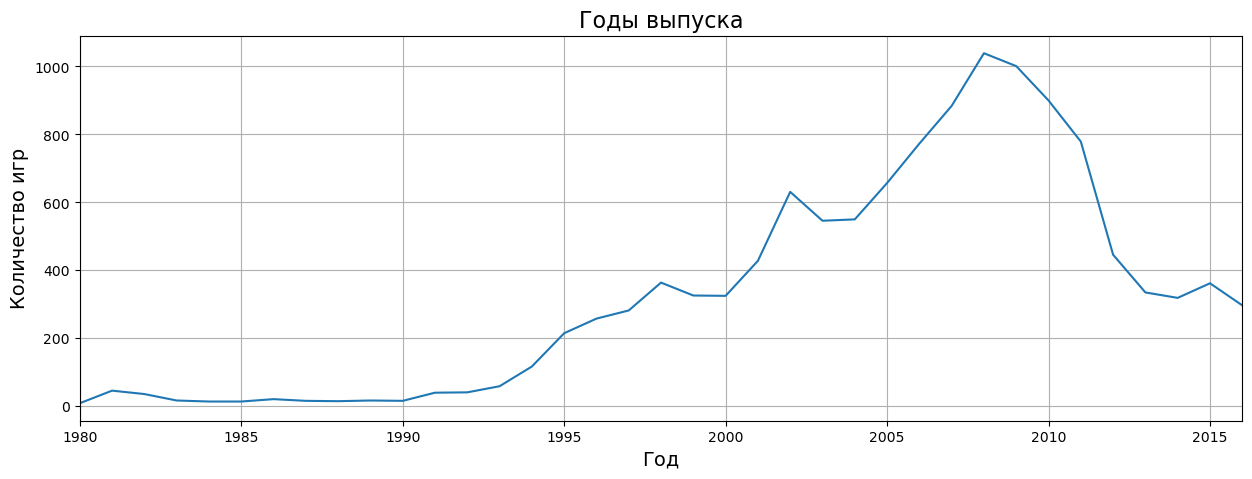

In [21]:
#отфильтруем данные без учета дубликатов игр, выпущенных в один год на разных платформах

games_count = data[~data.duplicated(subset=['name', 'year_of_release'])]

#построим график
games_count.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(15, 5))
plt.title('Годы выпуска', size=16)
plt.xlabel('Год', size=14)
plt.ylabel('Количество игр', size=14)
plt.xlim(1980, 2016)
plt.show();

### Вывод
<a id=16></a>

С 1980 по 1993 гг. ежегодно выпускалось по несколько десятков игр. В 1994 году Sony выпустила игровую приставку PlayStation, которая стала одной из самых популярных консолей в мире. И с этого года количество выпускаемых ежегодно игр начинает активно расти. В 2000-е появляются онлайн-игры и платные подписки для пользователей. В 2001 году были выпущены три основные игровые системы: GameCube и Game Boy Advance от Nintendo и Xbox от Microsoft. Наибольшего расцвета производство игр достигает в период с 2004 по 2009 гг.: было выпущено 40% игр от общего количества с 1980 по 2016 гг. В 2004 году на рынок вышла онлайн-игра World of Warcraft. В 2008 году компанией Apple был запущен магазин приложений App Store, с которого начинается расцвет мобильных игр и постепенное угасание игр для консолей и персональных компьютеров. С 2012 года наблюдается резкое снижение количества релизов (449 игр в 2012г. против 779 игр в 2011г.). Для общего представления об игровой индустрии можно оставить данные за 10 лет: с 1994 по 2016 гг.

### Анализ платформ по уровню продаж
<a id=17></a>

Рассмотрим продажи на отдельных платформах и построим распределение по годам для платформ с наибольшими суммарными продажами.

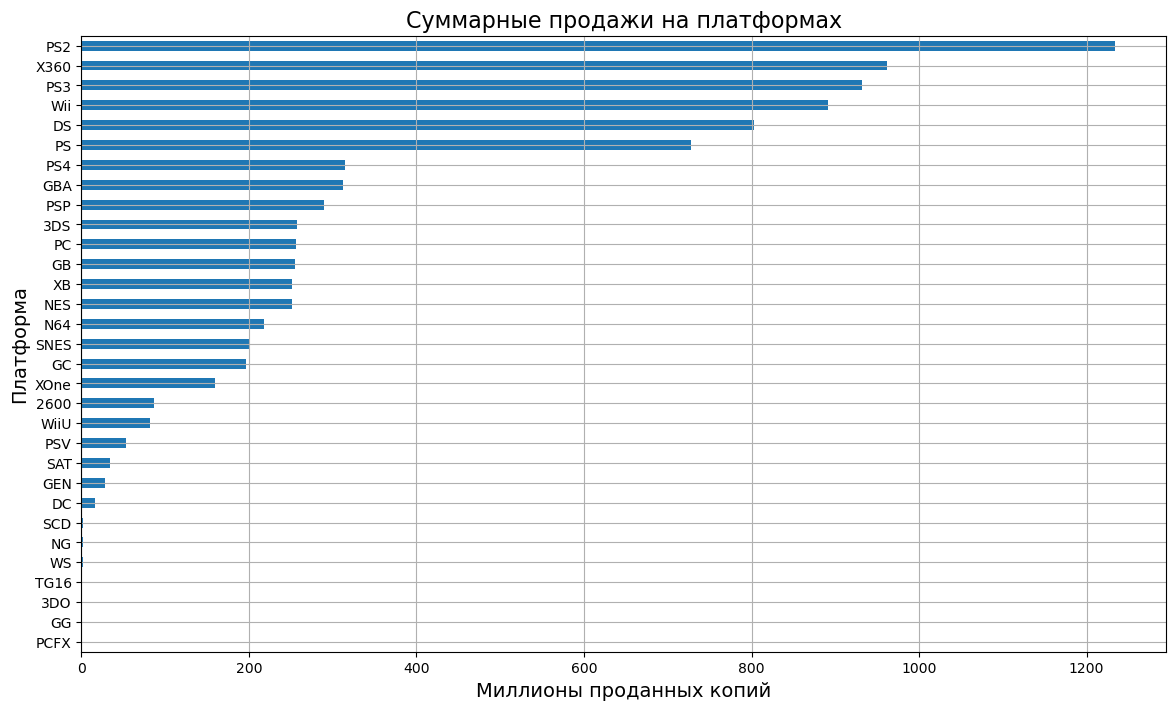

In [22]:
data.groupby('platform')['total_sales'].sum()\
.sort_values().plot(kind='barh', grid=True, figsize=(14, 8))
plt.title('Суммарные продажи на платформах', size=16)
plt.xlabel('Миллионы проданных копий', size=14)
plt.ylabel('Платформа', size=14)
plt.show();

На графике видно, что больше всего копий продано на 6 платформах: *PS2 (1233.56), X360 (961.24), PS3 (931.34), Wii (891.18), DS (802.78), PS (727.58)*. На платформах *SCD, NG, WS, TG16, 3DO, GG, PCFX* продано незначительное количество копий, которое не отображается на графике. На остальных платформах продано в разы меньше копий, чем на платформах "большой шестерки".

In [23]:
#создадим сводную таблицу с данными 6 платформ с наибольшими продажами

best_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
best_platforms = best_platforms [0:6]

data_best = data.query('platform in @best_platforms.index')\
            .pivot_table(index=['year_of_release'], columns='platform',values=['total_sales'],\
                         aggfunc={'total_sales':'sum'})

data_best 

total_sales                                        
platform                 DS      PS     PS2     PS3     Wii    X360
year_of_release                                                    
1985                   0.02     NaN     NaN     NaN     NaN     NaN
1994                    NaN    6.03     NaN     NaN     NaN     NaN
1995                    NaN   35.96     NaN     NaN     NaN     NaN
1996                    NaN   94.70     NaN     NaN     NaN     NaN
1997                    NaN  136.17     NaN     NaN     NaN     NaN
1998                    NaN  169.49     NaN     NaN     NaN     NaN
1999                    NaN  144.53     NaN     NaN     NaN     NaN
2000                    NaN   96.37   39.17     NaN     NaN     NaN
2001                    NaN   35.59  166.43     NaN     NaN     NaN
2002                    NaN    6.67  205.38     NaN     NaN     NaN
2003                    NaN    2.07  184.31     NaN     NaN     NaN
2004                  17.27     NaN  211.81     NaN     NaN     NaN
2005                 130.14     NaN  160.66     NaN     NaN    8.25
2006                 119.81     NaN  103.42   20.96  137.15   51.62
2007                 146.94     NaN   75.99   73.19  152.77   95.41
2008                 145.31     NaN   53.90  118.52  171.32  135.26
2009                 119.54     NaN   26.40  130.93  206.97  120.29
2010                  85.02     NaN    5.64  142.17  127.95  170.03
2011                  26.18     NaN    0.45  156.78   59.65  143.84
2012                  11.01     NaN     NaN  107.35   21.71   99.74
2013                   1.54     NaN     NaN  113.25    8.59   88.58
2014                    NaN     NaN     NaN   47.76    3.75   34.74
2015                    NaN     NaN     NaN   16.82    1.14   11.96
2016                    NaN     NaN     NaN    3.60    0.18    1.52

В сводной таблице бросается в глаза ячейка, которая относится к платформе *DS* и 1985 году. Известно, что игровая приставка *Nintendo DS* была выпущена в 2004 году. Рассмотрим данные подробнее.

In [24]:
data.query('platform == "DS" and year_of_release == 1985')

/var/folders/j6/tz6m4kt97nz2ltn15854k0qh0000gn/T/ipykernel_35408/1630538249.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data.query('platform == "DS" and year_of_release == 1985')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Игра *Strongest Tokyo University Shogi DS* не имеет отношения к игровой приставке Nintendo DS, поэтому строку с ошибочными дланными можно удалить.

In [25]:
data = data.drop(labels=[15957])
data.shape

(16442, 12)

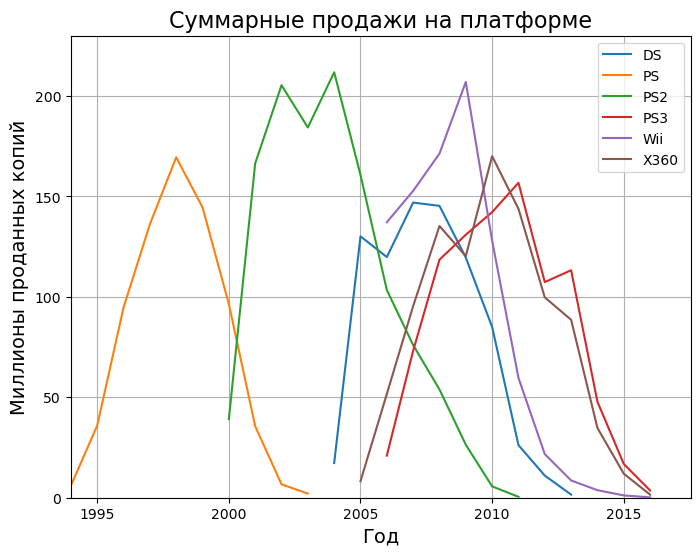

In [26]:
#построим распределение продаж на разных платформах по годам 

data_best.plot(y='total_sales', grid=True, figsize=(8, 6))
plt.title('Суммарные продажи на платформе', size=16)
plt.ylabel('Миллионы проданных копий', size=14)
plt.xlabel('Год', size=14)
plt.legend()
plt.ylim(0, 230)
plt.xlim(1994)
plt.show();

### Вывод
<a id=18></a>

На графике видно, что платформы в среднем существуют около 10 лет. "Первая" платформа *PS* просуществовала почти 20 лет, для взлета ей понадобилось 14 лет. Компания *PS2* просуществовала уже чуть более 10 лет. Первый взлет произошел уже через 3 года, затем через год после очереденого взлета началось стремительное падение. Платформы *DS, PS3, Wii, X360* развиваются стремительнее. В целом можно сказать, что наиболее активная деятельность была с 2005 по 2016 годы. Таким образом, средний "срок жизни" игровой платформы - около 10 лет.

### Определение актуального периода
<a id=19></a>

In [27]:
# определим актуальный период данных, которые будут использованы для построения прогноза на 2017 год

data_actual = data.query('2014 <= year_of_release').pivot_table(index=['year_of_release'], columns='platform',
                                                                        values=['total_sales'],\
                                                                        aggfunc={'total_sales':'sum'})
data_actual.reset_index().droplevel(0, axis=1)

/var/folders/j6/tz6m4kt97nz2ltn15854k0qh0000gn/T/ipykernel_35408/3305045720.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data_actual = data.query('2014 <= year_of_release').pivot_table(index=['year_of_release'], columns='platform',


platform,,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


### Вывод
<a id=20></a>

В качестве актуального периода возьмем 2014 - 2016 годы. Такой диапазон позволит, с одной стороны, отсечь платформы с низкими продажами, с другой, - проанализировать данные популярных платформ.

### Исследование уровня продаж платформ за актуальный период
<a id=21></a>

Определим, какие платформы лидируют по продажам, и выявим несколько потенциально прибыльных платформ.

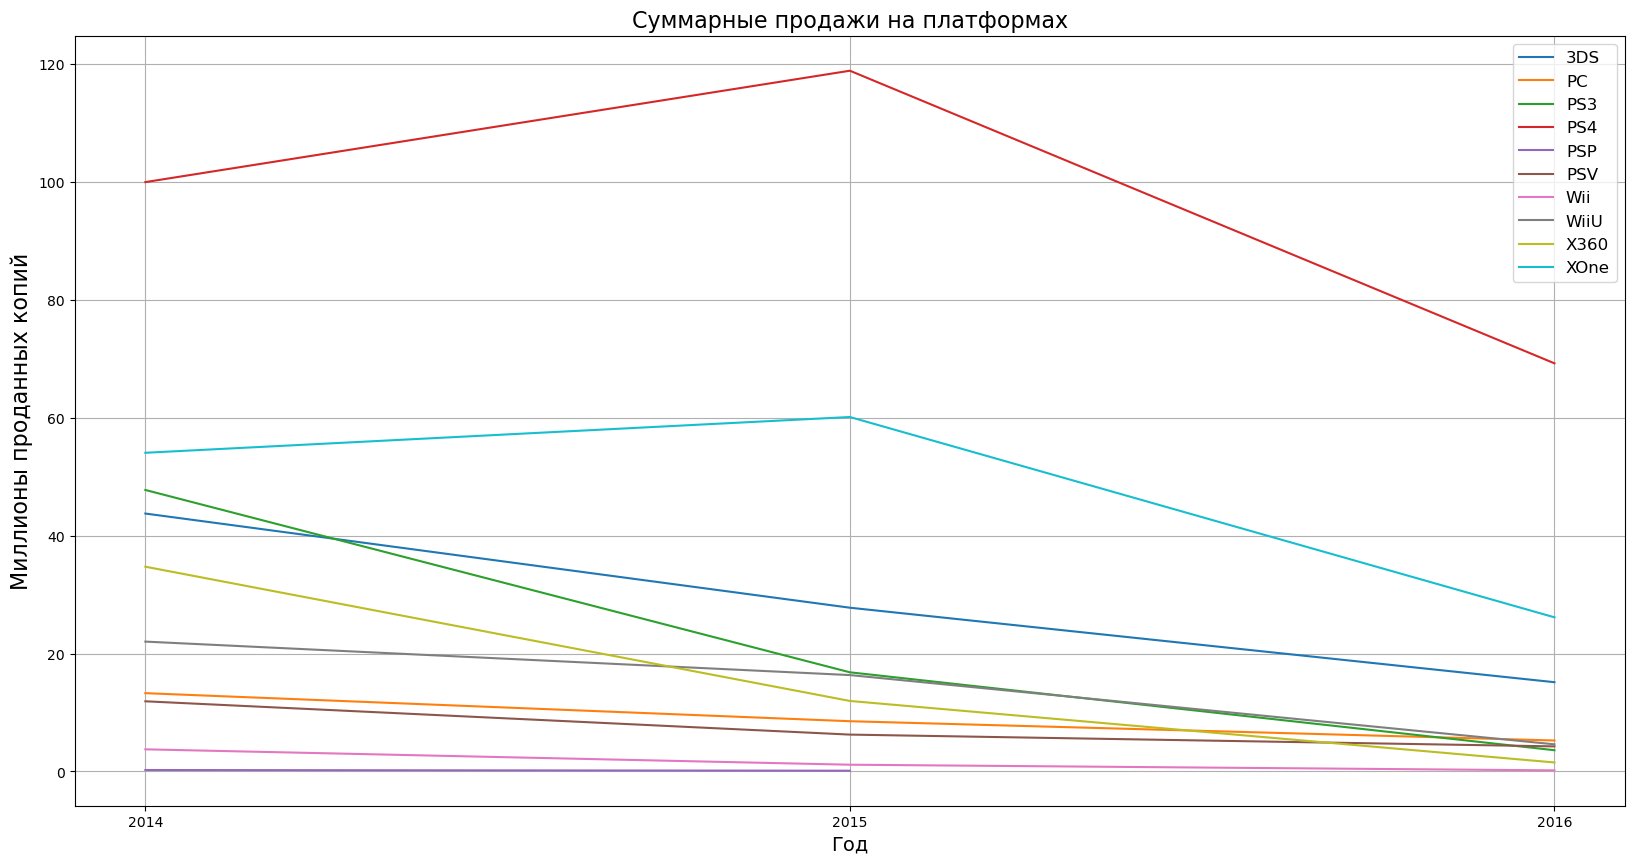

In [28]:
ticks = np.arange(2014, 2017, 1)

data_actual.plot(xticks=ticks, grid=True, figsize=(20,10))
plt.title('Суммарные продажи на платформах', size=16)
plt.ylabel('Миллионы проданных копий', size=16)
plt.xlabel('Год', size=14)
plt.legend(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], fontsize=12)
plt.show();

### Вывод
<a id=22></a>

С 2014 по 2016 гг. игры выходили на 10 платформах: *3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne*. Существование платформ *PSP, Wii* подходило к завершению из-за низких продаж. Активные продажи были на 3 платформах: *PS4*, *XOne* и *3DS*, но с каждым годом количество продаваемых игр уменьшалось. На остальных плафтормах был низкий уровень продаж. В качестве потенциально прибыльных платформ можно назвать *PS4*, *XOne* и *3DS*.

### Исследование глобальных продаж игр на различных платформах
<a id=23></a>




Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [29]:
#выделим платформы, на которых выходили игры в 2014-2016 гг. в отдельную таблицу

popular_platforms = data.query('year_of_release == [2014, 2015, 2016]')
popular_platforms.head()

/var/folders/j6/tz6m4kt97nz2ltn15854k0qh0000gn/T/ipykernel_35408/4032341335.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  popular_platforms = data.query('year_of_release == [2014, 2015, 2016]')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


/Users/marinagerasimova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinagerasimova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinagerasimova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


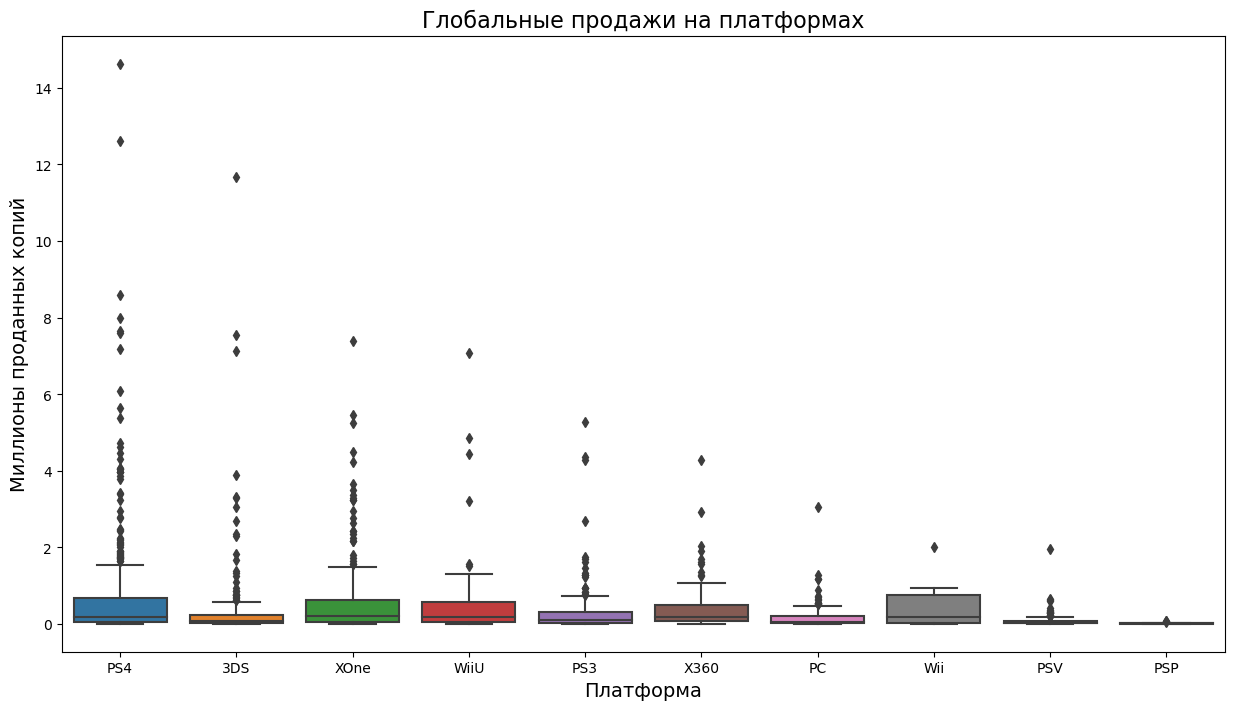

In [30]:
#построим общую диаграмму размаха для выделенных платформ

plt.figure(figsize=(15,8))
ax = sns.boxplot(y='total_sales', x='platform', data=popular_platforms)
ax.set_xlabel('Платформа', size = 14)
ax.set_ylabel('Миллионы проданных копий', size = 14)
ax.set_title('Глобальные продажи на платформах', size = 16)
plt.show();

/Users/marinagerasimova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinagerasimova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/marinagerasimova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


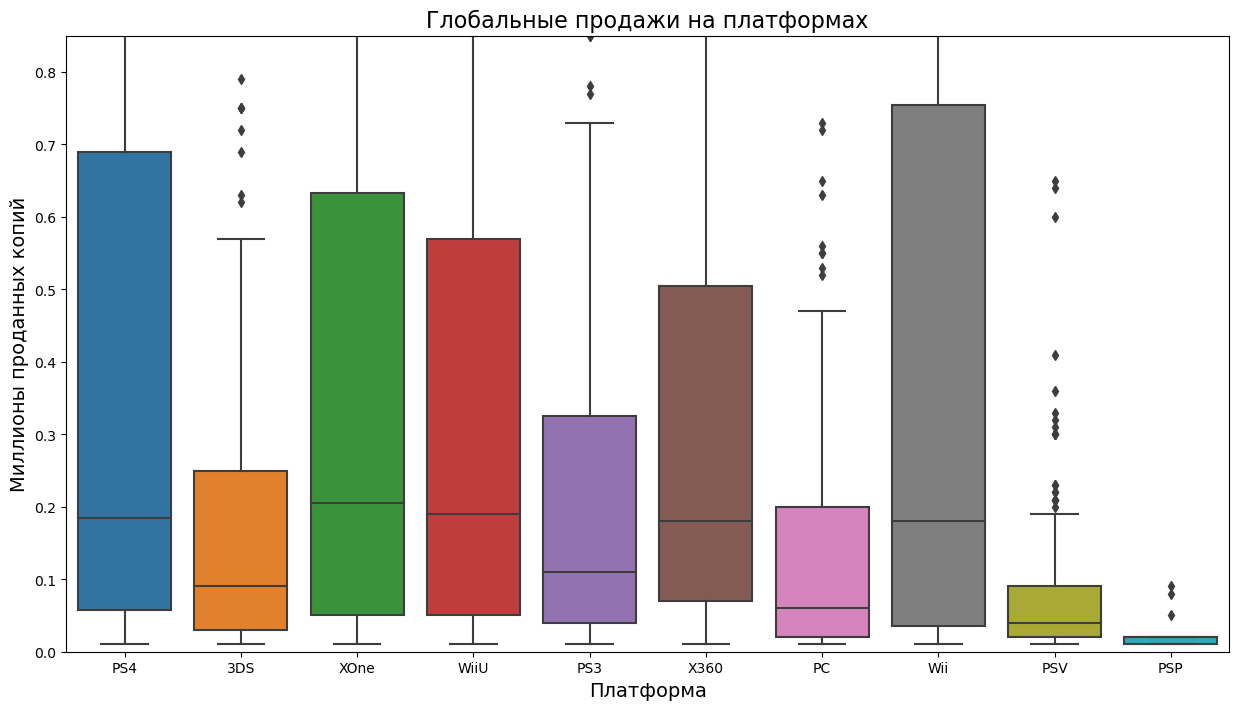

In [31]:
#построим диаграмму размаха с отсечением выбросов для большей наглядности

plt.figure(figsize=(15,8))
plt.ylim(0,0.85)
ax = sns.boxplot(y='total_sales', x='platform', data=popular_platforms)
ax.set_xlabel('Платформа', size = 14)
ax.set_ylabel('Миллионы проданных копий', size = 14)
ax.set_title('Глобальные продажи на платформах', size = 16)
plt.show();

<a id=24></a>
### Вывод 

На диаграммах размаха видно, что распределение по глобальным продажам неравномерно. На платформах *PSV* и *PSP* выходило и продавалось мало игр, потому что эти консоли были в исследуемый временной период непопулярны. На платформах *PS4* и *Wii* количество проданных копий от медианы до третьей квартили выше в ~3,5 раза, чем от первой квартили до медианы. На платформах *XOne, WiiU, X360* количество проданных копий от медианы до третьей квартили выше в ~3 раза, чем от первой квартили до медианы. Это значит, что после старта продаж количество проданных копий молниеносно возрастало. Самый высокий уровень продаж наблюдается на платформах *PS4, XOne, WiiU, X360, Wii*.

### Исследования влияния отзывов пользователей и критиков на продажи
<a id=25></a>

Рассмотрим влияние отзывов пользователей и критиков на продажи на платформах за выбранный период.

#### Анализ влияния отзывов критиков на суммарные продажи на платформе PS4
<a id=26></a>

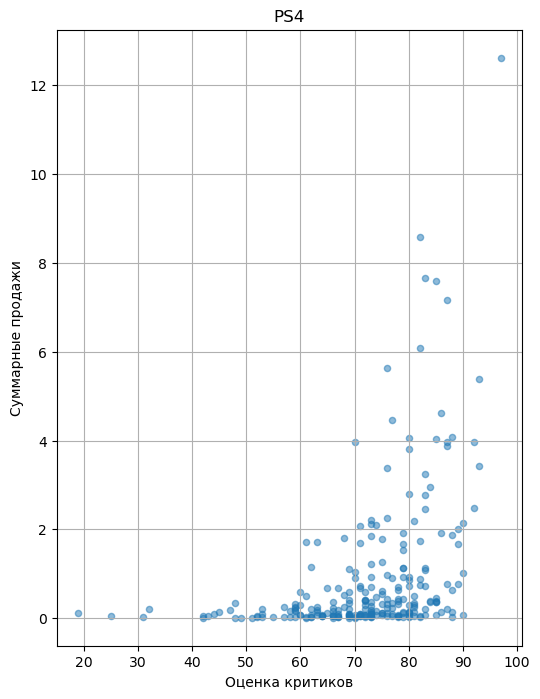

In [32]:
#построим диаграмму рассеяния

popular_platforms.loc[popular_platforms['platform'] == 'PS4'].plot(x='critic_score', y='total_sales',\
                                                                   title='PS4', grid=True, kind='scatter',\
                                                                   alpha=0.5, figsize=(6,8),\
                                                                   xlabel='Оценка критиков',\
                                                                   ylabel='Суммарные продажи');


In [33]:
#определим коээфициент корреляции

print('Коэффициент корреляции:', round(popular_platforms.loc[popular_platforms['platform'] == 'PS4']\
                                ['critic_score'].corr(popular_platforms.loc[popular_platforms['platform'] == 'PS4']\
                                                ['total_sales']), 2))

Коэффициент корреляции: 0.4


#### Вывод
<a id=27></a>

Диаграмма рассеяния и коэффициент Пирсона демонстрируют слабую положительную корреляцию между уровнем продаж и оценками критиков.

#### Анализ влияния отзывов пользователей на суммарные продажи на платформе PS4
<a id=28></a>

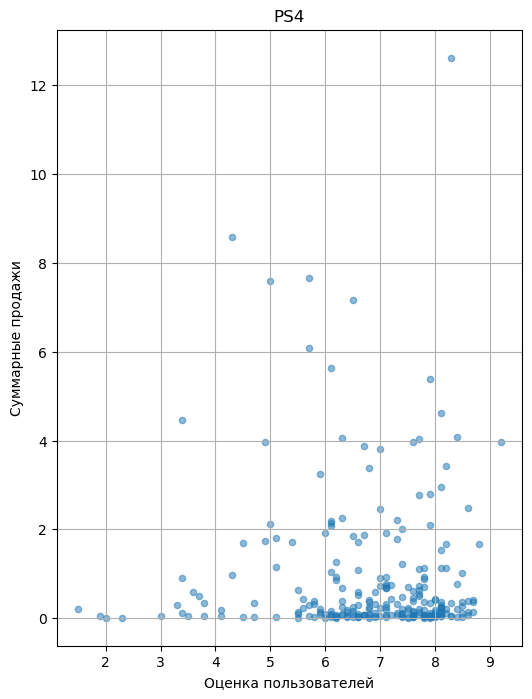

In [34]:
#определим влияние отзывов пользователей на суммарные продажи на популярной платформе PS4

popular_platforms.loc[popular_platforms['platform'] == 'PS4'].plot(x='user_score', y='total_sales',\
                                                                   title='PS4', grid=True, kind='scatter',\
                                                                   alpha=0.5, figsize=(6,8),\
                                                                   xlabel='Оценка пользователей',\
                                                                   ylabel='Суммарные продажи');
    

In [35]:
#определим коэффициент корреляции

'Коэффициент корреляции:', round(popular_platforms.loc[popular_platforms['platform'] == 'PS4']\
                                ['user_score'].corr(popular_platforms.loc[popular_platforms['platform'] == 'PS4']\
                                                    ['total_sales']), 2)


('Коэффициент корреляции:', -0.04)

#### Вывод
<a id=29></a>

Диаграмма рассеяния и коэффициент Пирсона демонстрируют, что корреляция между уровнем продаж и отзывами пользователей отсутствует.

#### Анализ влияния отзывов критиков на суммарные продажи на других платформах
<a id=30></a>

'Коэффициент корреляции:'

0.4

'Коэффициент корреляции:'

0.31

'Коэффициент корреляции:'

0.43

'Коэффициент корреляции:'

0.37

'Коэффициент корреляции:'

0.45

'Коэффициент корреляции:'

0.53

'Коэффициент корреляции:'

0.17

'Коэффициент корреляции:'

nan

'Коэффициент корреляции:'

0.04

'Коэффициент корреляции:'

nan

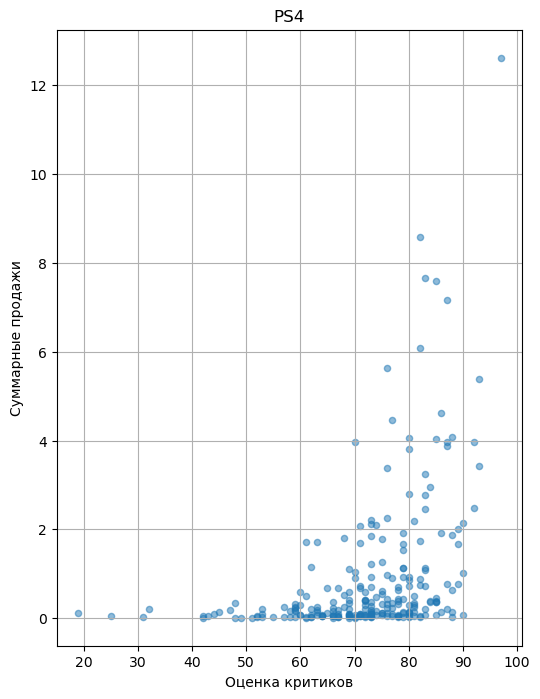

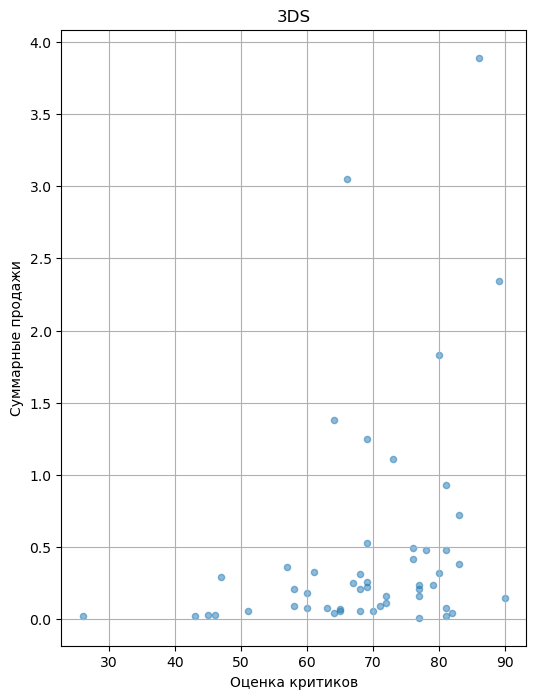

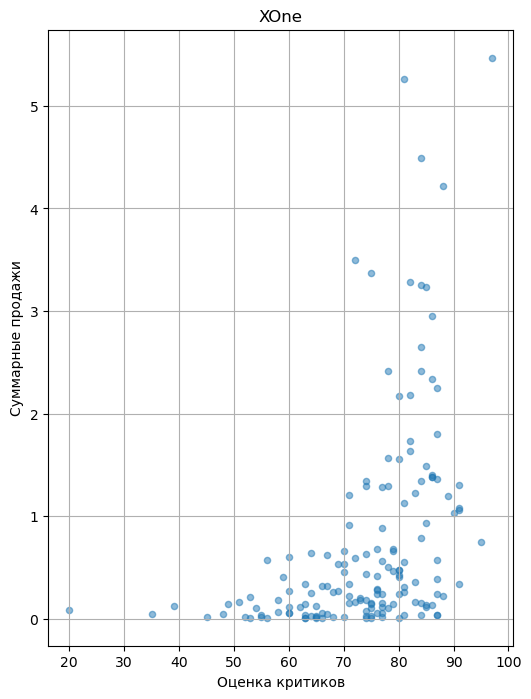

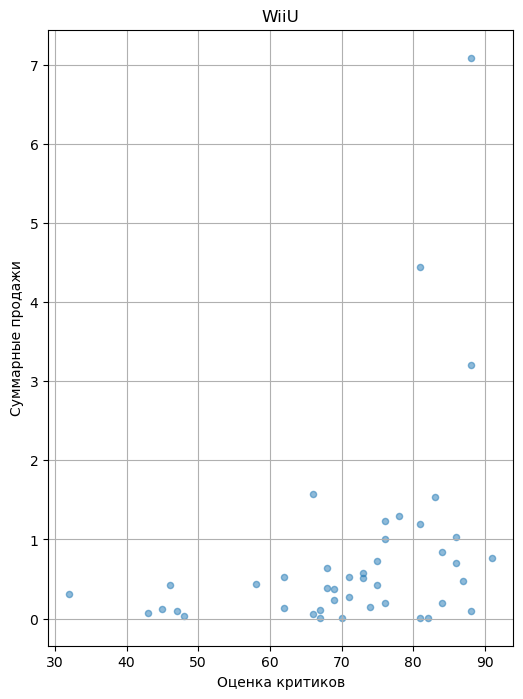

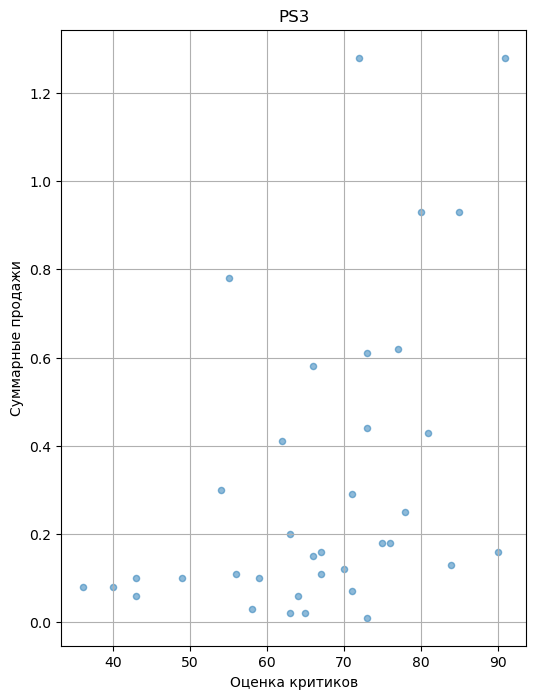

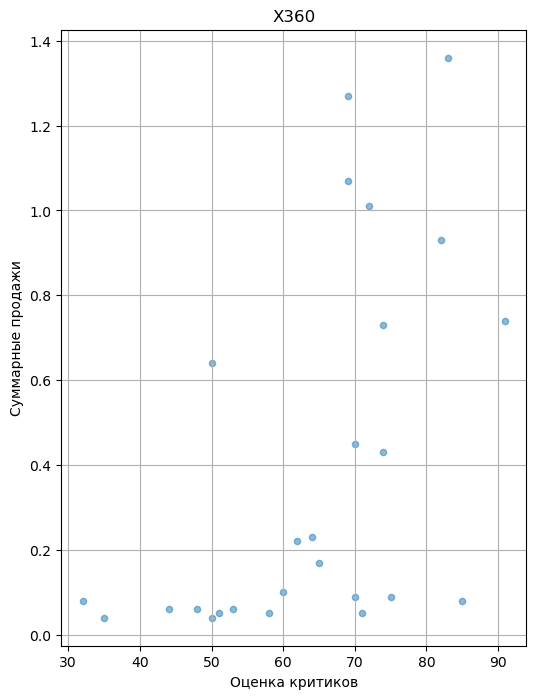

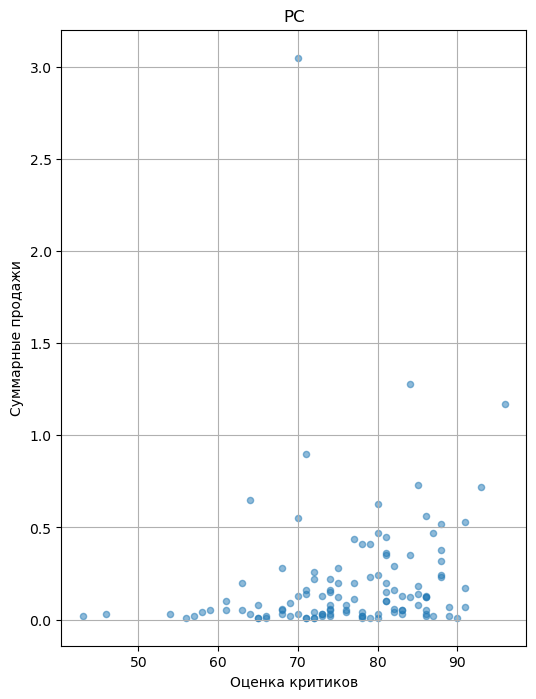

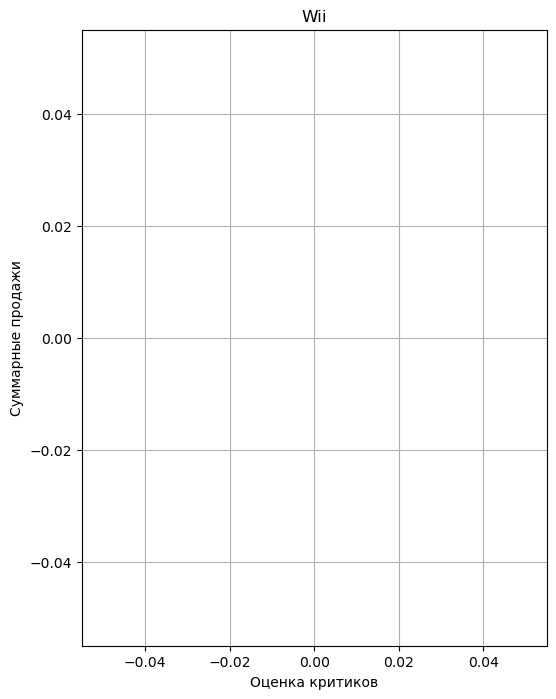

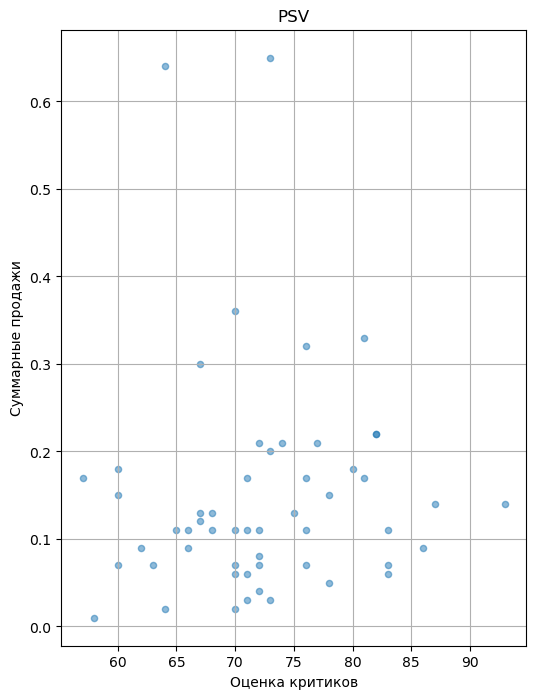

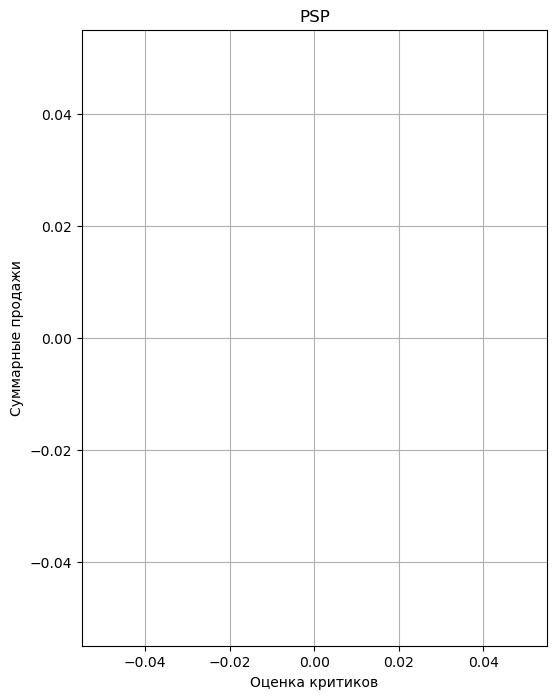

In [36]:
#определим влияние отзывов критиков на суммарные продажи на других платформах за выбранный период

for i in popular_platforms['platform'].unique():
    popular_platforms.loc[(popular_platforms['platform'] == i)].plot(x='critic_score', y='total_sales',\
                                                                     title=i, grid=True, kind='scatter',\
                                                                     alpha=0.5, figsize=(6,8),\
                                                                     xlabel='Оценка критиков',\
                                                                     ylabel='Суммарные продажи');
    
    display('Коэффициент корреляции:', round(popular_platforms.loc[(popular_platforms['platform'] == i)]\
                                             ['critic_score'].corr(popular_platforms\
                                                                   .loc[(popular_platforms['platform'] == i)]\
                                                                   ['total_sales']), 2))



#### Вывод
<a id=31></a>

Диаграмма рассеяния и коэффициент Пирсона демонстрируют слабую положительную корреляцию между уровнем продаж и оценками критиков.

#### Анализ влияния отзывов пользователей на суммарные продажи на других платформах
<a id=32></a>

'Коэффициент корреляции:'

-0.04

'Коэффициент корреляции:'

0.22

'Коэффициент корреляции:'

-0.07

'Коэффициент корреляции:'

0.41

'Коэффициент корреляции:'

-0.17

'Коэффициент корреляции:'

-0.14

'Коэффициент корреляции:'

-0.07

'Коэффициент корреляции:'

1.0

'Коэффициент корреляции:'

-0.17

'Коэффициент корреляции:'

nan

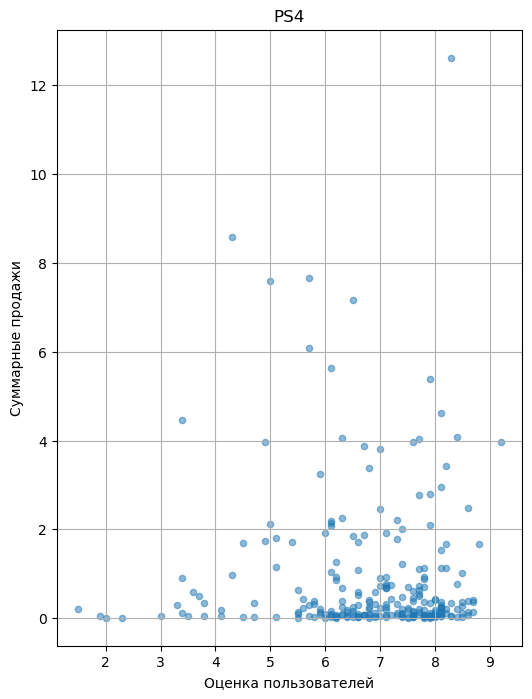

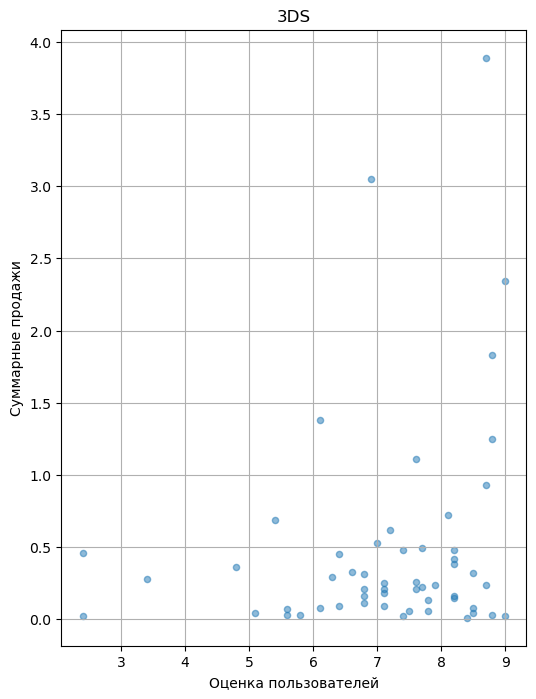

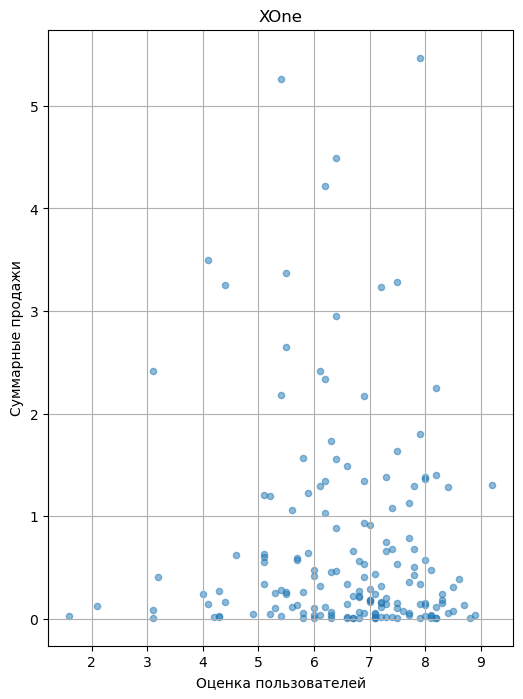

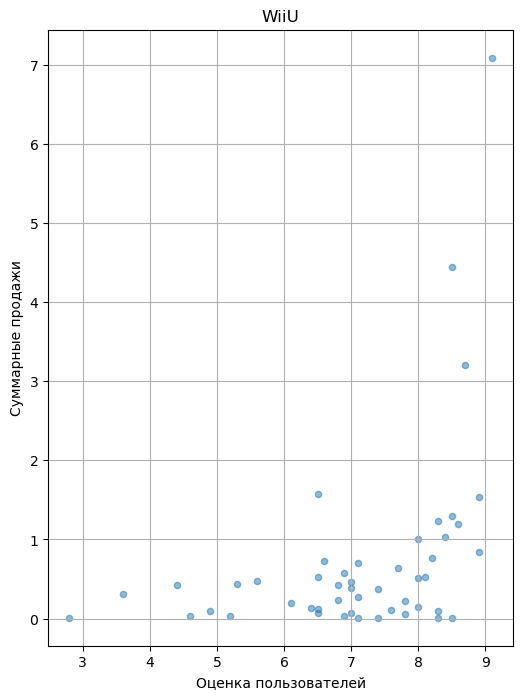

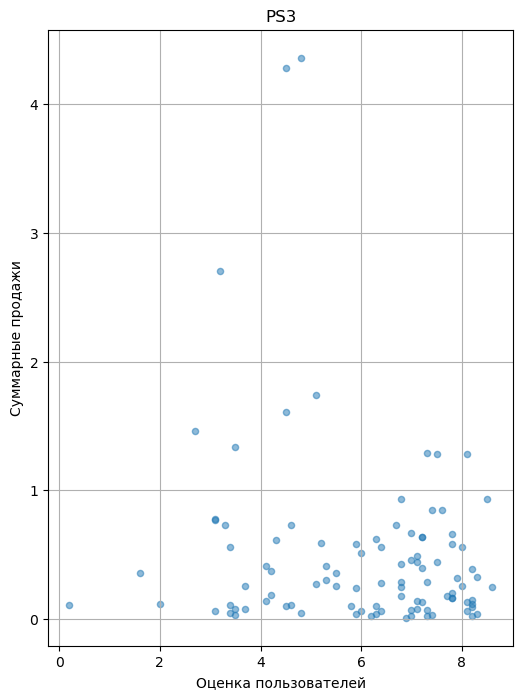

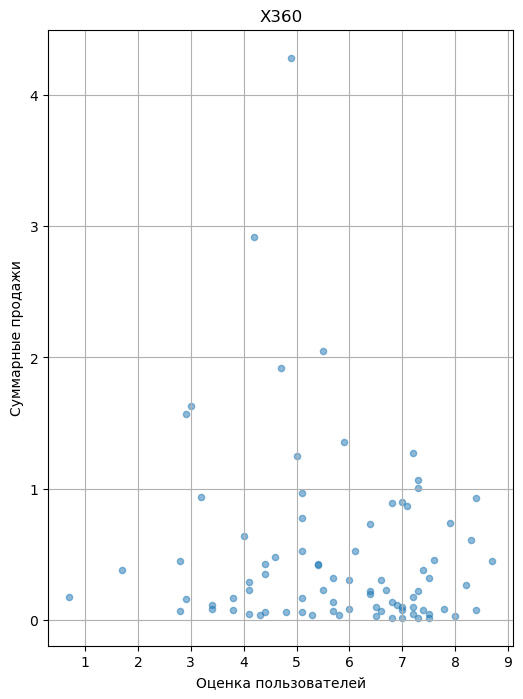

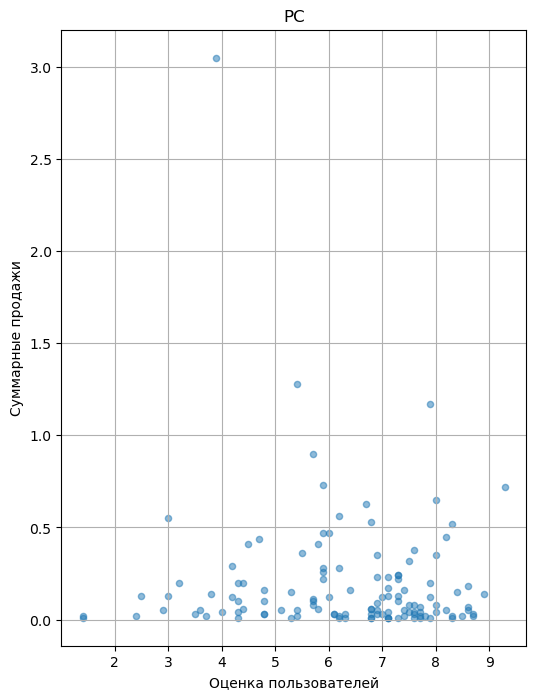

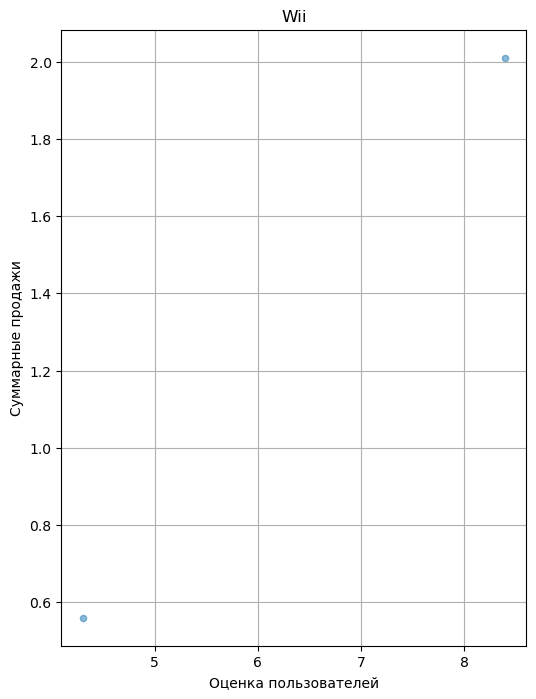

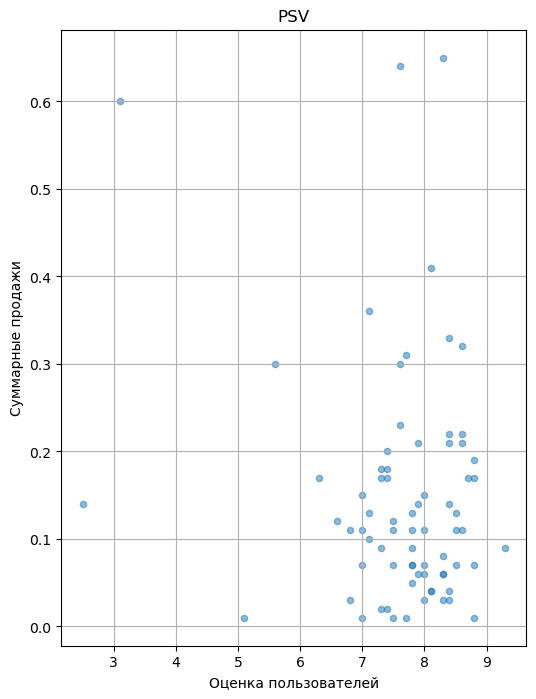

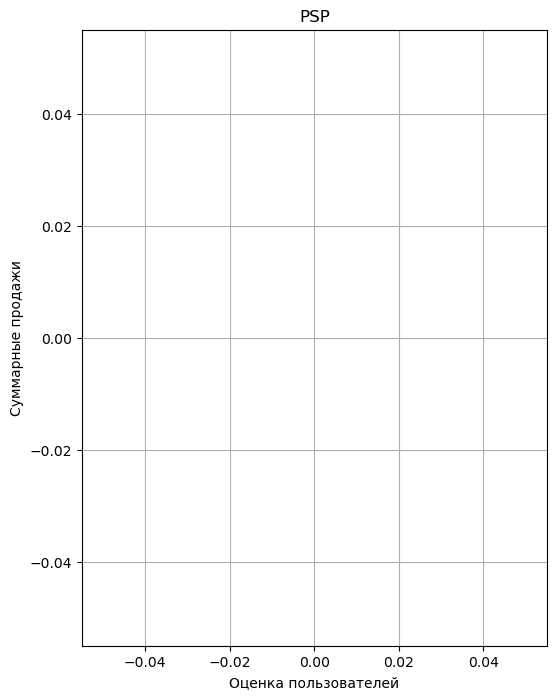

In [37]:
#определим влияние отзывов пользователей на суммарные продажи на других платформах за выбранный период

for i in popular_platforms['platform'].unique():
    popular_platforms.loc[(popular_platforms['platform'] == i)].plot(x='user_score', y='total_sales',\
                                                                     title=i, grid=True, kind='scatter',\
                                                                     alpha=0.5, figsize=(6,8),\
                                                                     xlabel='Оценка пользователей',\
                                                                     ylabel='Суммарные продажи');
    
    display('Коэффициент корреляции:', round(popular_platforms.loc[(popular_platforms['platform'] == i)]\
                                             ['user_score'].corr(popular_platforms\
                                                                 .loc[(popular_platforms['platform'] == i)]\
                                                                 ['total_sales']), 2))



#### Вывод
<a id=33></a>

Диаграмма рассеяния и коэффициент Пирсона демонстрируют слабую положительную корреляцию между уровнем продаж на платформах *3DS, WiiU* и отзывами пользователей. На остальных платформах корреляция между уровнем продаж и отзывами пользователей отсутствует.

### Вывод
<a id=34></a>

В целом можно сказать, что между уровнем продаж на платформах *3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne* и оценками критиков есть слабая положительная корреляция. Также слабая положительная корреляция наблюдается между продажам на платформах *3DS, WiiU* и отзывами пользователей. На остальных платформах корреляция между уровнем продаж и отзывами пользователей отсутствует.

### Распределение игр по жанрам
<a id=35></a> <a id='section_2'></a>

In [38]:
#определим общее количество игр в различных жанрах

popular_platforms.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

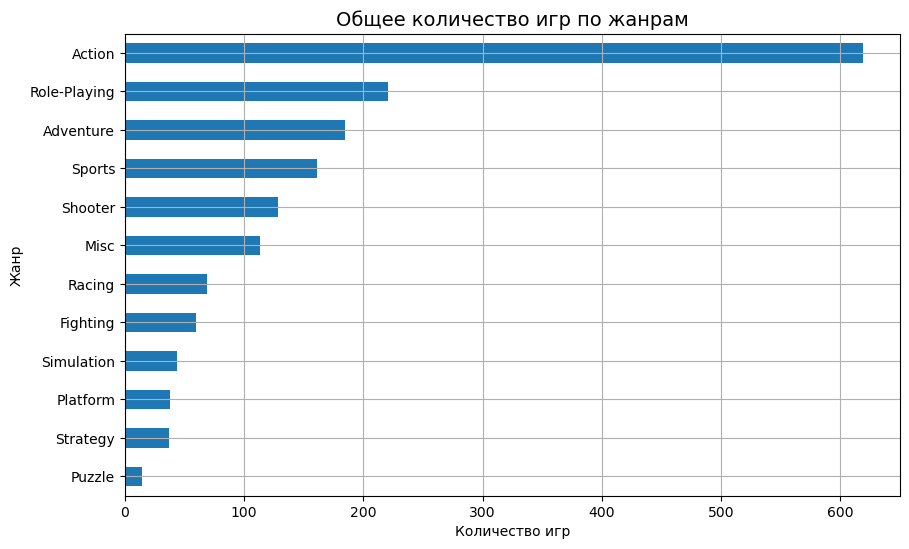

In [39]:
# построим график общего количества игр в различных жанрах

popular_platforms.groupby('genre')['name'].count().sort_values().plot(kind='barh', grid=True, figsize=(10,6))
plt.title('Общее количество игр по жанрам', size=14)
plt.xlabel('Количество игр', size=10)
plt.ylabel('Жанр', size=10);
plt.show();

Самое большое количество игр выпускается в жанре *Action* (619 игр). Также много игр выходит в следующих жанрах: *Role-Playing (221), Adventure (185), Sports (161), Shooter (128), Misc (113)*. 

In [40]:
#определим уровень продаж по жанрам

round(popular_platforms.groupby('genre')['total_sales'].median().sort_values(ascending=False), 2)

genre
Shooter         0.52
Sports          0.18
Platform        0.14
Fighting        0.12
Role-Playing    0.11
Simulation      0.10
Action          0.09
Misc            0.09
Racing          0.09
Strategy        0.06
Puzzle          0.04
Adventure       0.03
Name: total_sales, dtype: float64

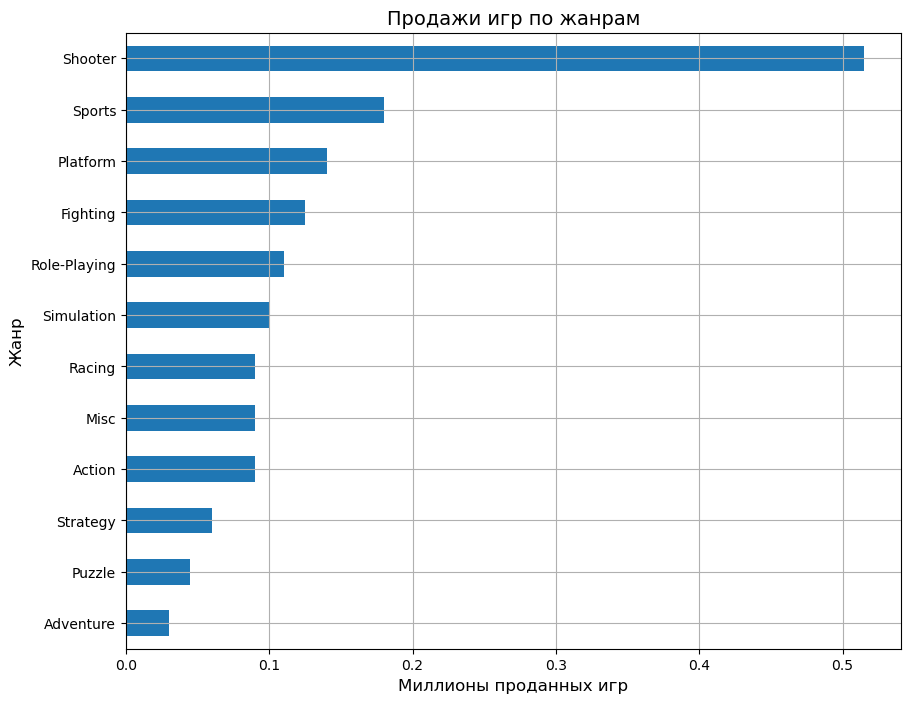

In [41]:
# построим график общих продаж игр по жанрам

popular_platforms.groupby('genre')['total_sales'].median().sort_values()\
.plot(kind='barh', grid=True, figsize=(10,8));
plt.title('Продажи игр по жанрам', size=14);
plt.xlabel('Миллионы проданных игр', size=12);
plt.ylabel('Жанр', size=12);

Самые высокие продажи у игр, созданных в жанре *Shooter* (0.52). Они превосходят ближайшие по уровню продаж жанры *Sports (0.18)* и *Platform (0.14)* в 3-4 раза. Остальные жанры находятся на одинаково невысоком уровне.

### Вывод
<a id=36></a>

В датафрейме представлено 12 жанров: *Action, Role-Playing, Adventure, Sports, Shooter, Misc, Racing, Fighting, Simulation, Platform, Strategy, Puzzle*. В результате сопоставления игр по жанрам и уровню продаж можно сделать вывод, что самое большое количество игр производится в жанре *Action*, а продается - в жанре *Shooter*. Игр *Action* в 5 раз больше, чем  *Shooter*, но продажи ниже, в 6 раз. То есть количество не всегда означает качество. 

## Портрет пользователя каждого региона
<a id=37></a>
<a id='section_id'></a>

### Топ-5 популярных платформ для каждого региона
<a id=38></a>

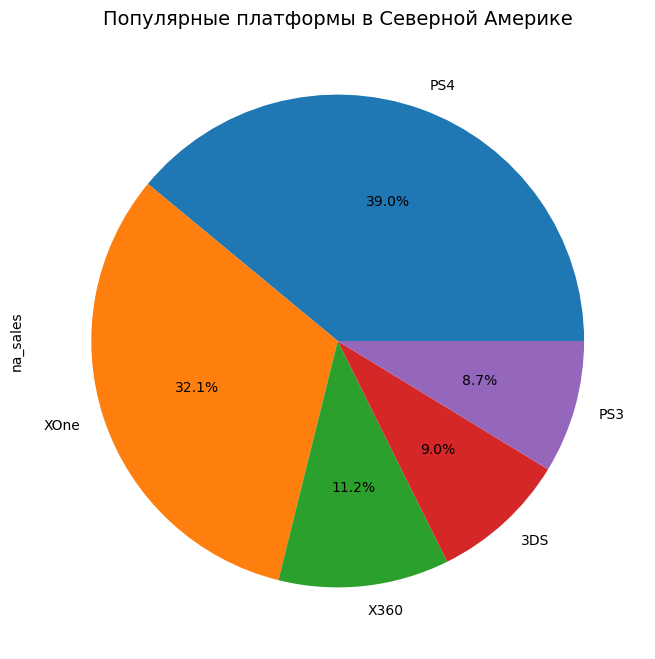

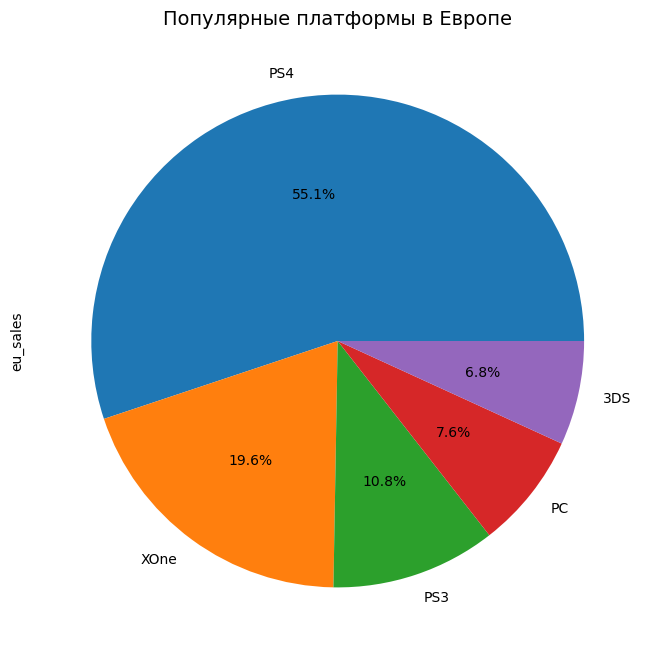

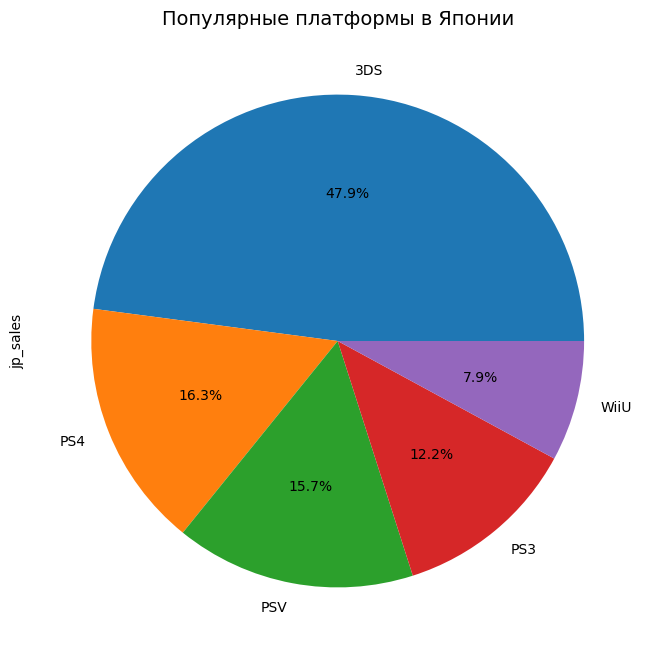

In [42]:
# построим круговые диаграммы для выявления наиболее популярных платформ в каждом регионе

plt.figure(figsize=(15,8))
popular_platforms.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%')
plt.title('Популярные платформы в Северной Америке', size=14)
plt.show()

plt.figure(figsize=(15,8))
popular_platforms.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%')
plt.title('Популярные платформы в Европе', size=14)
plt.show()

plt.figure(figsize=(15,8))
popular_platforms.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%')
plt.title('Популярные платформы в Японии', size=14)
plt.show();

### Вывод
<a id=39></a>

В Северной Америке и Европе среди пользователей популярны почти одни и те же платформы, но с разным процентным соотношением. Так, первое и второе места в рейтинге занимают *PS4, XOne*, но в СА 39% и 32.1%, а в Европе 55,4% и 19.6%. Оставшиеся 3 места и ~30% делят следуюшие платформы: *X360* (11.2%), *3DS* (9%), *PS3* (8.7%) в Северной Америке и *PS3* (10.8%), *PC* (7.6), *3DS* (6.8%). В Японии популярны только японские платформы и лидируют *3DS* (47,9%), занимающая в североамериканском и европейском рейтингах последние позиции. Вторые - четвертые позиции практически одинаково распределяются между *PS4* (16.3%), *PSV* (15.7%), *PS3* (12.2%). Замыкает японский рейтинг платформа *WiiU* (7.9%), которой нет в рейтингах Северной Америки и Европы.

### Топ-5 популярных жанров для каждого региона
<a id=40></a>

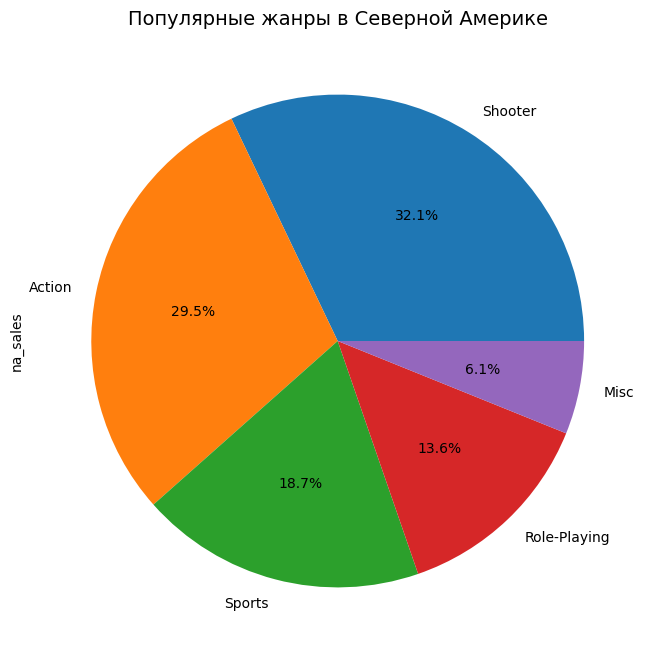

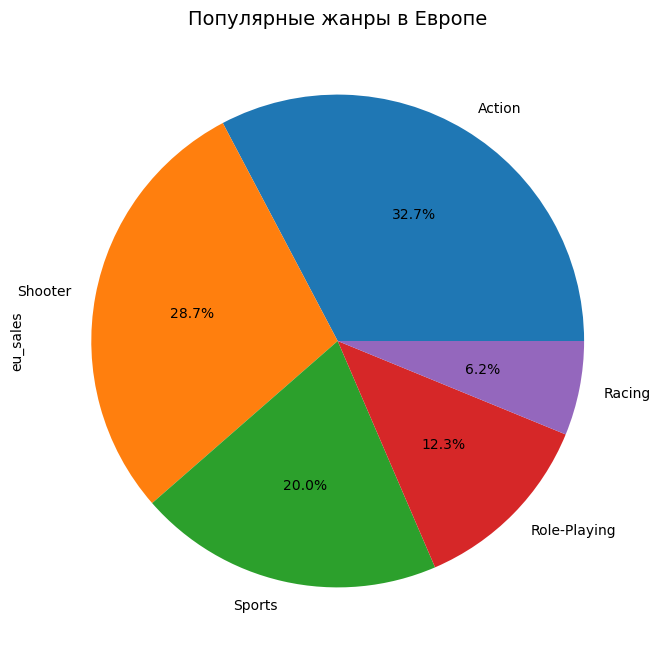

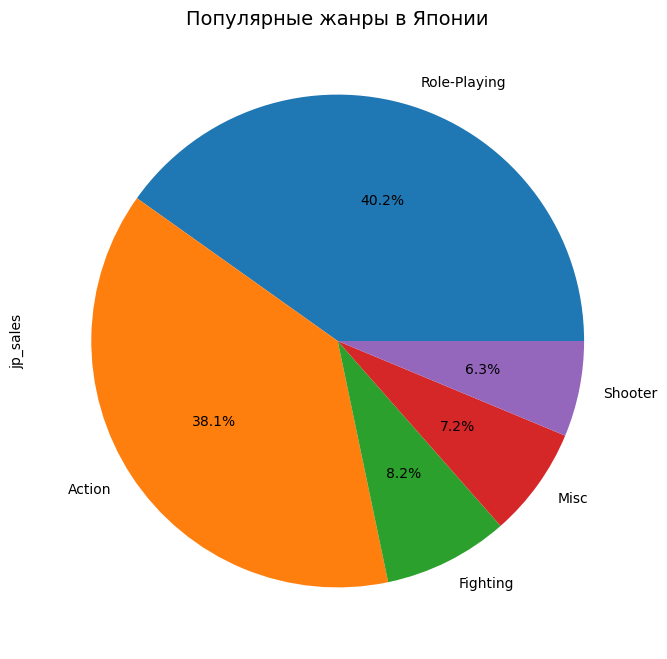

In [43]:
# построим круговые диаграммы для определения наиболее популярных жанров в каждом регионе

plt.figure(figsize=(15,8))
popular_platforms.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%');
plt.title('Популярные жанры в Северной Америке', size=14);
plt.show()

plt.figure(figsize=(15,8))
popular_platforms.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%');
plt.title('Популярные жанры в Европе', size=14);
plt.show()

plt.figure(figsize=(15,8))
popular_platforms.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%');
plt.title('Популярные жанры в Японии', size=14);
plt.show()

### Вывод
<a id=41></a>

В Северной Америке и Европе практически одинаково популярны жанры *Shooter, Action*: 31.1% и 29.1% в СА и 28.7% и 32.7% в Европе. В Японии рейтинг самых популярных жанров возглавляет *Role-Playing* (40.2%), второе место (38.1%) занимает *Action*. Стоит отметить, что в Японии жанр *Shooter* непопулярен и замыкает этот рейтинг (6.3%).
На третьем и четвертом местах в рейтингах Северной Америки и Европы жанры *Sports, Role-Playing*: 18.7% и 13.6% в СА и 20% и 12.3% в Европе. В Японии на этих местах другие жанры: *Fighting, Misc* (8.2%, 7.2%). 
В целом можно сказать, что в Северной Америке и Европе рейтинги похожи. Значительные отличия есть в рейтинге Японии.

### Влияние рейтинга ESRB на продажи в отдельном регионе
<a id=42></a>

In [44]:
#найдем все уникальные значения в столбце rating

popular_platforms['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

В столбце *rating* есть пропуски, поэтому временно заполним их значением *No*.

In [45]:
esrb = popular_platforms.fillna('No')
esrb.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,No,No,No,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,No,No,No,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,No,No,No,7.98


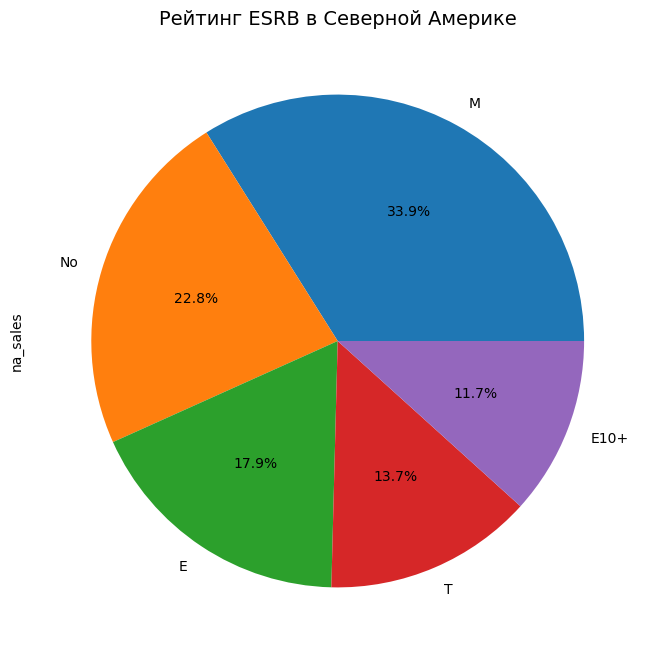

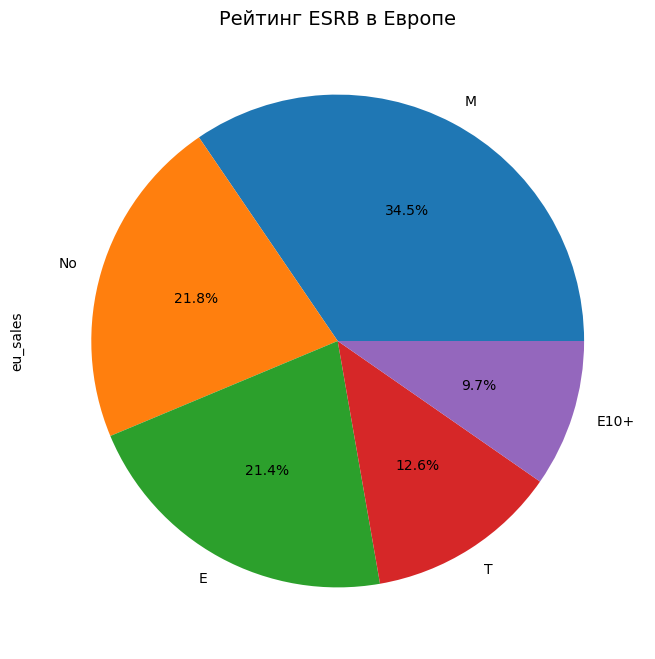

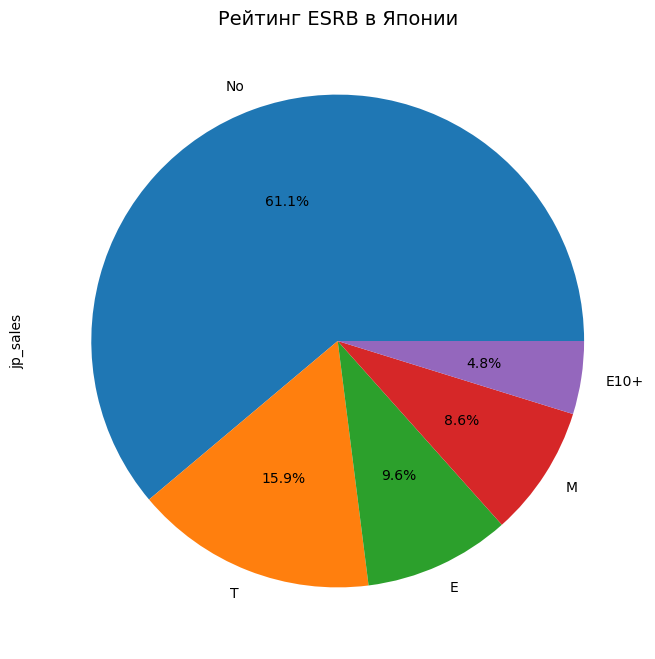

In [46]:
#построим круговые диаграммы для определения наиболее продаваемых игр с разным рейтингом

plt.figure(figsize=(15,8))
esrb.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%');
plt.title('Рейтинг ESRB в Северной Америке', size=14);
plt.show()

plt.figure(figsize=(15,8))
esrb.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%');
plt.title('Рейтинг ESRB в Европе', size=14);
plt.show()

plt.figure(figsize=(15,8))
esrb.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head()\
.plot(kind='pie', grid=True, autopct='%.1f%%');
plt.title('Рейтинг ESRB в Японии', size=14);
plt.show()

### Вывод
<a id=43></a>

В выбранном временном периоде (2014-2016 гг.) представлены игры 4 категорий ESRB: *M* («Mature» — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет), *E* («Everyone» — «Для всех»), *T* («Teen» — «Подросткам»: Игра подходит для лиц от 13 лет), *E10+* («Everyone 10 and older» — «Для всех от 10 лет и старше») и *No* (отсутствует категория этого рейтинга). В Северной Америке и Европе популярны игры одних и тех же категорий, но с небольшой разницей в процентном соотношении: игры для взрослых (*M*): 33.9% и 34.5%; игры без рейтинга *ESRB*: 22.8% и 21.8%; игры для всех (*E*): 17.9% и 21.4%; игры для подростков (*T*): 13.7% и 12.6%; игры для всех от 10 лет (*E10+*): 11.7% и 9.7%. В Японии же самые популярные игры - это игры без рейтинга ESRB (61.1%). Затем идут игры для подростков (15.9%), для всех (9.6%), для взрослых (8.6%) и затем для всех старше 10 лет - 4.8%. 
Популярность в Японии игр без рейтинга можно объяснить тем, что *ESRB* - это рейтинг, созданный в США. В Японии же существует собственный рейтинг *CERO*.

## Вывод
<a id=44></a>

Анализ продаж компьютерных игр показал, что в **Северной Америке** пользователь предпочитает игровую приставку Play Station 4 или Xbox One, игры в жанре *Shooter* или *Action* для лиц старше 17 лет.
**В Европе** пользователь выбирает игровую приставку Play Station 4, игры в жанре *Action* или *Shooter* для лиц старше 17 лет.
**В Японии** пользователь остановит свой выбор на игровой системе Nintendo 3DS, играх в жанре *Role-Playing* или *Action* без категории рейтинга *ESRB*.

## Проверка гипотез
<a id=45></a>

### Гипотеза 1
<a id=46></a>

H₀: средние пользовательские рейтинги платформ Xbox One и PC равны.

H1: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [47]:
#проверим нулевую гипотезу

xone = popular_platforms.loc[popular_platforms['platform'] == 'XOne']['user_score'].dropna()
pc = popular_platforms.loc[popular_platforms['platform'] == 'PC']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(xone, pc)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


### Вывод
<a id=47></a>

Нулевая гипотеза не отвергнута. Это значит, что средние пользовательские рейтинги *Xbox One* и *PC* равны.

### Гипотеза 2
<a id=48></a>

H₀: средние пользовательские рейтинги жанров *Action* и *Sports* равны.

H1: средний пользовательский рейтинг жанра *Action* выше, чем средний пользовательский рейтинг жанра *Sports*.

In [48]:
#проверим нулевую гипотезу

action = popular_platforms.loc[popular_platforms['genre'] == 'Action']['user_score'].dropna()
sports = popular_platforms.loc[popular_platforms['genre'] == 'Sports']['user_score'].dropna()

alpha = 0.05

results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [49]:
#проверим альтернативную гипотезу

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть альтернативную гипотезу') 

p-значение: 5.912775191322278e-15
Отвергаем альтернативную гипотезу


### Вывод
<a id=49></a>

Нулевая гипотеза отвергнута. Это значит, что средние пользовательские рейтинги жанров *Action* и *Sports* не равны. Альтернативная гипотеза также отвергнута, поэтому можно утверждать, что средний пользовательский рейтинг жанра *Action* ниже, чем средний пользовательский рейтинг жанра *Sports*.

## Вывод
<a id=50></a>

В результате проверки двух гипотез можно сделать вывод, что средние пользовательские рейтинги Xbox One и PC равны и средний пользовательский рейтинг жанра *Action* ниже, чем средний пользовательский рейтинг жанра *Sports*. 

## Общий вывод
<a id=51></a>

**1.** В **исходной таблице** *data* было 11 колонок и 16715 строк. Присутствовали пропуски в колонках *Name* (2 пропуска), *Year_of_Release* (269 пропусков),*Genre* (2 пропуска), *Critic_Score* (8578 пропусков), *User_Score* (6701 пропуск), *Rating* (6766 пропусков).


**2.** В **процессе предобработки данных** в колонках *year_of_release* и *user_score* был изменен тип данных на *int* и *float* соответственно. В столбце *user_score* строки со значением *tbd* были заполнены *None* для дальнейших математических операций. После обработки пропусков и дубликатов были удалены 272 строки. В колонках *critic_score*, *user_score* и *rating* пропуски сохранены, так как заполнить их не представляется возможным, но и удалять их не стоит. Был добавлен столбец *total_sales* c суммарными продажами во всех регионах. Таким образом, после предобработки данных в таблице *data* осталось 16443 строки и 12 колонок. 


**3.** К **результатам исследовательского анализа** данных можно отнести следующее:

**3.1** В исходных данных представлена информация о выпущенных играх в период с 1980 по 2016 гг. включительно. В 1994 году Sony выпустила игровую приставку PlayStation, которая стала одной из самых популярных консолей в мире. И с этого года количество выпускаемых ежегодно игр начинает активно расти. Наибольшего расцвета производство игр достигает в период с 2004 по 2009 гг.: было выпущено 40% игр от общего количества с 1980 по 2016 гг. В 2004 году на рынок вышла онлайн-игра World of Warcraft. В 2008 году компанией Appe был запущен магазин приложений App Store, с которого начинается расцвет мобильных игр и постепенное угасание игр для консолей и персональных компьютеров. С 2012 года наблюдается резкое снижение количества релизов (449 игр в 2012г. против 779 игр в 2011г.).

**3.2** С 1980 по 2016 гг. больше всего копий продано на 6 платформах: *PS2* (1233.56), *X360* (961.24), *PS3* (931.34), *Wii* (891.18), *DS* (802.78), *PS* (727.58). На платформах *SCD, NG, WS, TG16, 3DO, GG, PCFX* продано незначительное количество копий.

**3.3** Анализ платформ с наибольшими суммарными продажами (*S2, X360, PS3, Wii, DS, PS*) показал, что игровые платформы в среднем существуют около 10 лет. "Первая" платформа *PS* просуществовала почти 20 лет, для взлета ей понадобилось 14 лет. Компания *PS2* просуществовала уже чуть более 10 лет. Первый взлет произошел уже через 3 года, затем через год после очереденого взлета началось стремительное падение. Платформы *DS, PS3, Wii, X360* развиваются стремительнее. Наиболее активная деятельность была с 2005 по 2016 годы.

**3.4** Для дальнейшего исследования обратимся к данным за 2014 - 2016 гг. Такой диапазон позволит, с одной стороны, отсечь платформы с низкими продажами, с другой стороны, проанализировать данные популярных платформ.

**3.5** В указанный выше период гры выходили на 10 платформах: *3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne*. Существование платформ *PSP, Wii* подходило к завершению из-за низких продаж. Активные продажи были на 3 платформах: *PS4*, *XOne* и *3DS*, но с каждым годом количество продаваемых игр уменьшалось. На остальных плафтормах был низкий уровень продаж. В качестве потенциально прибыльных платформ можно назвать *PS4*, *XOne* и *3DS*.

**3.6** Распределение по глобальным продажам неравномерно. На платформах *PS4* и *Wii* количество проданных копий от медианы до третьей квартили выше в ~3,5 раза, чем от первой квартили до медианы. На платформах *XOne, WiiU, X360* количество проданных копий от медианы до третьей квартили выше в ~3 раза, чем от первой квартили до медианы. Это значит, что после старта продаж количество проданных копий молниеносно возрастало. Самый высокий уровень продаж наблюдается на платформах *PS4, XOne, WiiU, X360, Wii*.

**3.7** Между уровнем продаж на платформах *3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, XOne* и оценками критиков есть слабая положительная корреляция. Также слабая положительная корреляция наблюдается между продажами на платформах *3DS, WiiU* и отзывами пользователей. На остальных платформах корреляция между уровнем продаж и отзывами пользователей отсутствует.


**3.8** В исследуемых данных представлено 12 жанров: *Action, Role-Playing, Adventure, Sports, Shooter, Misc, Racing, Fighting, Simulation, Platform, Strategy, Puzzle*. Самое большое количество игр производится в жанре *Action*, а продается - в жанре *Shooter*. Игр *Action* в 5 раз больше, чем  *Shooter*, но продажи ниже в 6 раз. 

Подробнее с распределением игр по жанрам можно ознакомиться [здесь](#section_2).


**4.** В результате анализа продаж компьютерных игр  **портрет пользователя** каждого региона можно описать следующим образом:

**4.1** в **Северной Америке** пользователь предпочитает игровую приставку *Play Station 4* или *Xbox One*, игры в жанре *Shooter* или *Action* для лиц старше 17 лет.

**4.2** В **Европе** пользователь выбирает игровую приставку *Play Station 4*, игры в жанре *Action* или *Shooter* для лиц старше 17 лет.

**4.3** В **Японии** пользователь остановит свой выбор на игровой системе *Nintendo 3DS*, играх в жанре *Role-Playing* или *Action* без категории рейтинга *ESRB*.

Подробнее с результатами этого анализа можно ознакомиться в разделе [*Портрет пользователя каждого региона*](#section_id) .


**5.** В результате **проверки** двух **гипотез** можно сделать вывод, что средние пользовательские рейтинги *Xbox One* и *PC* равны и средний пользовательский рейтинг жанра *Action* ниже, чем средний пользовательский рейтинг жанра *Sports*. 

**Таким образом**, интернет-магазину "Стримчик" в 2017 году стоит обратить внимание на игры в жанрах *Shooter*, *Action* и *Role-Playing* для игровых приставок *Play Station 4*, *Xbox One* и *3DS* для подростков и лиц старше 17 лет. Также необходимо помнить о региональных особенностях покупателей и рейтингах других стран.